In [1]:
import pandas as pd 

This notebook provides a brief description of the data that i used in the next notebooks

# notebook descriptions

`00_brief_data_description`: contains descriptions for all notebooks, datasets, folders hosted in the machine (PC) and 
m each notebook


`01_create_seq_dset`: shows how the data was collected together with an exploratory data analysis of protein sequences present in the Betalactamase DataBase (BLDB)


`02_generate_embeddings`: shows how to generate embeddings from 8 protein language models


`03_dim_redo_split_class`: shows the procedure of reduction of dimensionality using PCA, tSNE and UMAP


`04_create_functional_dsets_and_tanimoto`: shows how to merge the data of sequences retrived from BLDB and MICs from BLDB2 to create the main dataset. It also includes the procedure to create a second dataset of enzyme kinetics not analyzed in this master thesis. Finally shows how to compute the tanimoto similarity between 50 betalactam antibiotics.


`05_EDA_functional_dsets_50anti`: shows a simple Exploratory Data Analysis with functional (mics and kinetics) and chemical datasets


`06_map_seqspace_split_class_pt1`


`07_classA_FullDset_n_singal`


`08_map_seqspace_pt2_split_class`


`09_select_best_regressor`


`10_train_with_best_model`



# Folder description 

In [2]:
! tree -L 2 /home/gama/bla_analysis/

/home/gama/bla_analysis/
├── data
│   ├── ancestors
│   ├── bldb
│   ├── bldb2
│   ├── lra5
│   ├── recognized_fams
│   ├── risso_consA
│   └── varG
├── notebooks
│   ├── 00_brief_data_description.ipynb
│   ├── 01_create_seq_dset.ipynb
│   ├── 02_generate_embeddings.ipynb
│   ├── 03_dim_redo_split_class.ipynb
│   ├── 04_create_functional_dsets_and_tanimoto.ipynb
│   ├── 05_EDA_functional_dsets_50anti.ipynb
│   ├── 06_map_seqspace_split_class_pt1.ipynb
│   ├── 07_classA_FullDset_n_singal.ipynb
│   ├── 08_map_seqspace_pt2_split_class.ipynb
│   ├── 09_select_best_regressor.ipynb
│   ├── 10_train_with_best_model.ipynb
│   ├── CSN_tutorial
│   ├── borrame
│   ├── cv_example.ipynb
│   ├── extract_accessions.ipynb
│   ├── netgpi.tsv
│   ├── netgpi_dataset.fasta
│   ├── neural_regression.ipynb
│   ├── old_3_dim_redo.ipynb
│   ├── old_5_EDA_functional_dsets.ipynb
│   ├── old_6_map_seqspace_pt1.ipynb
│   ├── old_7_map_seqspace_pt2.ipynb
│   ├── peiper_plots.ipynb
│   ├── plagio.ipynb
│   ├── ran

# Datasets description 

## Notebook 1

df_annots contains all of the sequences used in thes master thesis, with their respective:
1. betalactamase class, subclass and family
2. biochemical properties
3. Taxonomy annotates with diamond agains GTDB_RS207
3. predicted signal peptide by SignalPv6

In [4]:
df_annots = pd.read_csv("../results/tables/df_annot_all.csv", sep = "\t")
print(df_annots.columns)
df_annots

Index(['#name', 'seq', 'length', 'filename', 'protein_name', 'protein_family',
       'bla_class', 'bla_subclass', 'protein_family_header', 'seq_id',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept'],
      dtype='object')


#name  \
0      gi|5596421|emb|CAB51471.1|ACI-1| class A exten...   
1      AHN92697.1|ACI-2| beta-lactamase [uncultured b...   
2      EHO64028.1|ACI-3| hypothetical protein HMPREF9...   
3      AHN92696.1|ACI-4| beta-lactamase [uncultured b...   
4        AMP55835.1|ACI-5| classA [uncultured bacterium]   
...                                                  ...   
26018  WP_000778170.1 VarG family subclass B1-like me...   
26019  WP_000701356.1 VarG family subclass B1-like me...   
26020  WP_000701355.1 VarG family subclass B1-like me...   
26021  WP_000701301.1 VarG family subclass B1-like me...   
26022       ACH59002.1 LRA-5 [uncultured bacterium BLR5]   

                                                     seq  length  \
0      MKKFCFLFLIICGLMVFCLQDCQARQKLNLADLENKYNAVIGVYAV...     284   
1      MKKFCFLFLIICGLMFFCLQDCQARQKLNLADLENKYNAVIGVYAV...     284   
2      MKKFCFLFLIICGLMVFSLQDCQARQKLNLADLENKYNAVIGVYAV...     284   
3      MKKFCFLFLIICGLMVFCLQGCQARQKLNLADLENKYNAVIGVYAV...     284   
4      MKKFCFLFLIICGLMVFCLQDCQARQKLNLADLENKYNAVIGVYAV...     284   
...                                                  ...     ...   
26018  MKLSTLALAPIAAALFAFNVSANGHDHDNQRAIFFHGEKAPIAQTE...     373   
26019  MKIPTLALAPIAAALFAFNANAHEHKRSIYFPDETSSKVVQTEVEP...     370   
26020  MKIPTLALAPIAAALFAFNANAHEHKRSIYFPDETSSEVVQTEVEP...     370   
26021  MKIPNLALAPIAAALFAFNANAHEHKRSIYFPDETSSKVVQTEVEP...     370   
26022  MKTIFGKRRQSAVVLITLIAILLASGQPYQSSQVRGAACLPDIIFD...     326   

                 filename protein_name protein_family bla_class bla_subclass  \
0      A-ACI-1-prot.fasta        ACI-1            ACI   Class A      Class A   
1      A-ACI-2-prot.fasta        ACI-2            ACI   Class A      Class A   
2      A-ACI-3-prot.fasta        ACI-3            ACI   Class A      Class A   
3      A-ACI-4-prot.fasta        ACI-4            ACI   Class A      Class A   
4      A-ACI-5-prot.fasta        ACI-5            ACI   Class A      Class A   
...                   ...          ...            ...       ...          ...   
26018            VarG seq     VarG seq           VarG      VarG         VarG   
26019            VarG seq     VarG seq           VarG      VarG         VarG   
26020            VarG seq     VarG seq           VarG      VarG         VarG   
26021            VarG seq     VarG seq           VarG      VarG         VarG   
26022         lra_5.fasta        LRA-5          LRA-5   Class A      Class A   

      protein_family_header     seq_id  ...            Species  \
0                       ACI      seq_0  ...                NaN   
1                       ACI      seq_1  ...                NaN   
2                       ACI      seq_2  ...                NaN   
3                       ACI      seq_3  ...                NaN   
4                       ACI      seq_4  ...                NaN   
...                     ...        ...  ...                ...   
26018                  VarG  seq_26018  ...                NaN   
26019                  VarG  seq_26019  ...  s__Vibrio mimicus   
26020                  VarG  seq_26020  ...  s__Vibrio mimicus   
26021                  VarG  seq_26021  ...  s__Vibrio mimicus   
26022                 LRA-5  seq_26022  ...                NaN   

       predicted_signal_peptide  Other_sigpept  SP(Sec/SPI)  LIPO(Sec/SPII)  \
0                          LIPO       0.000157     0.499448        0.500170   
1                          LIPO       0.000125     0.499552        0.500104   
2                          LIPO       0.000129     0.499544        0.500129   
3                          LIPO       0.000000     0.000000        1.000020   
4                          LIPO       0.000208     0.499119        0.500343   
...                         ...            ...          ...             ...   
26018                        SP       0.000361     0.998432        0.000266   
26019                        SP       0.000308     0.998656        0.000250   
26020                        SP       0.000304  

## Notebook 

df_plm contains the embeddings from 7 protein language models and aminoacid composition vectors as well as the CARP640M likelihoods

In [2]:
df_plm = pd.read_pickle("../results/embeddings/all_plm.pkl")
df_plm

seq_id                                                seq  \
0          seq_0  MKKFCFLFLIICGLMVFCLQDCQARQKLNLADLENKYNAVIGVYAV...   
1          seq_1  MKKFCFLFLIICGLMFFCLQDCQARQKLNLADLENKYNAVIGVYAV...   
2          seq_2  MKKFCFLFLIICGLMVFSLQDCQARQKLNLADLENKYNAVIGVYAV...   
3          seq_3  MKKFCFLFLIICGLMVFCLQGCQARQKLNLADLENKYNAVIGVYAV...   
4          seq_4  MKKFCFLFLIICGLMVFCLQDCQARQKLNLADLENKYNAVIGVYAV...   
...          ...                                                ...   
26018  seq_26017  MKLSTLALAPIAAALLTFNASAKGHDHDNQRAIFFPGETVQDTVKI...   
26019  seq_26018  MKLSTLALAPIAAALFAFNVSANGHDHDNQRAIFFHGEKAPIAQTE...   
26020  seq_26019  MKIPTLALAPIAAALFAFNANAHEHKRSIYFPDETSSKVVQTEVEP...   
26021  seq_26020  MKIPTLALAPIAAALFAFNANAHEHKRSIYFPDETSSEVVQTEVEP...   
26022  seq_26021  MKIPNLALAPIAAALFAFNANAHEHKRSIYFPDETSSKVVQTEVEP...   

                                                   esm1b  \
0      [0.1102982, 0.014699467, -0.14032564, 0.258299...   
1      [0.10703633, 0.017742604, -0.14941521, 0.25984...   
2      [0.10849612, 0.017496616, -0.14619425, 0.26836...   
3      [0.12845756, 0.017484514, -0.13535379, 0.24379...   
4      [0.10706033, 0.013306678, -0.14212927, 0.25449...   
...                                                  ...   
26018  [0.033977885, 0.2099972, -0.03804998, 0.106422...   
26019  [0.040876266, 0.2043898, -0.015767168, 0.10294...   
26020  [0.044713225, 0.1989737, -0.016214604, 0.09130...   
26021  [0.044318486, 0.19327989, -0.017119728, 0.0940...   
26022  [0.04461412, 0.199995, -0.020781625, 0.0949049...   

                                                     esm  \
0      [-1.9012868, 0.22372644, 0.21296117, -0.166722...   
1      [-1.91362, 0.15840982, 0.18624821, -0.169153, ...   
2      [-1.8146169, 0.20834586, 0.23776329, -0.163906...   
3      [-1.8452643, 0.23816845, 0.23408653, -0.152660...   
4      [-1.8473366, 0.2200377, 0.23291773, -0.1457919...   
...                                                  ...   
26018  [-1.7197676, 0.03665721, 0.4062646, 0.27256438...   
26019  [-1.6569757, 0.103168234, 0.37261948, 0.298090...   
26020  [-1.8027551, -0.054471187, 0.356291, 0.2774920...   
26021  [-1.8163025, -0.007135033, 0.3879411, 0.245572...   
26022  [-1.8516614, -0.09044339, 0.37824488, 0.252750...   

                                                  onehot  \
0      [0.08450704, 0.024647888, 0.08450704, 0.045774...   
1      [0.08098592, 0.024647888, 0.08450704, 0.042253...   
2      [0.08450704, 0.02112676, 0.08450704, 0.0457746...   
3      [0.08450704, 0.024647888, 0.08098592, 0.045774...   
4      [0.08450704, 0.024647888, 0.08450704, 0.045774...   
...                                                  ...   
26018  [0.07219251, 0.0, 0.07486631, 0.040106952, 0.0...   
26019  [0.08042896, 0.0, 0.061662197, 0.048257373, 0....   
26020  [0.08108108, 0.0, 0.06216216, 0.045945946, 0.0...   
26021  [0.08108108, 0.0, 0.06216216, 0.048648648, 0.0...   
26022  [0.07837838, 0.0, 0.06216216, 0.045945946, 0.0...   

                                                 t5xlu50  \
0      [0.008956722, 0.02665889, 0.02402008, 0.014990...   
1      [0.0076766736, 0.027014462, 0.027420135, 0.013...   
2      [0.009324158, 0.02478514, 0.022525383, 0.01392...   
3      [0.004128871, 0.033653855, 0.028860169, 0.0124...   
4      [0.0077304444, 0.029016294, 0.023319585, 0.014...   
...                                                  ...   
26018  [0.007419476, 0.007811315, -0.021516398, 0.019...   
26019  [0.011291199, 0.003993584, -0.023162339, 0.025...   
26020  [0.009738536, 0.0032915308, -0.022912802, 0.02...   
26021  [0.011506303, 0.00066137884, -0.02221559, 0.02...   
26022  [0.010414982, 0.002133661, -0.024551, 0.021942...   

                                                   t5bfd  \
0      [0.023663048, -0.0007369746, -0.0076412507, 0....   
1      [0.026570462, 0.0026666287, -0.006873358, -0.0...   
2      [0.02341963, -0.004910054, -0.008731285, 0.005...   
3      [0.014434682, -0.002682737

## Notebook 

df_{dim_redo_algo} contains the seq dataset with annotations and the respective 2-axis or dimensions generated with PCA, tSNE or UMAP for serin (sbl) or emtalo (mbl) betalactamases. 

In [6]:
# serin 
df_pca_sbl = pd.read_csv("../results/dim_redo/splitted_classes/pca/all_plm_sbl.csv")
print(df_pca_sbl.columns)
df_pca_sbl

Index(['PC1_t5xlu50', 'PC2_t5xlu50', 'seq_id', 'PC1_t5bfd', 'PC2_t5bfd',
       'PC1_aa_composition', 'PC2_aa_composition', 'PC1_esm', 'PC2_esm',
       'PC1_bepler', 'PC2_bepler', 'PC1_xlnet', 'PC2_xlnet', 'PC1_esm1b',
       'PC2_esm1b', 'PC1_carp640M', 'PC2_carp640M', '#name', 'seq', 'length',
       'filename', 'protein_name', 'protein_family', 'bla_class',
       'bla_subclass', 'protein_family_header', 'molecular_weight',
       'aromaticity', 'instability', 'gravy', 'isoelectric_point', 'entropy',
       'helix', 'turn', 'sheet', 'is_clust90_rep', 'bitscore', 'Domain',
       'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species',
       'predicted_signal_peptide', 'Other_sigpept', 'SP(Sec/SPI)',
       'LIPO(Sec/SPII)', 'TAT(Tat/SPI)', 'TATLIPO(Sec/SPII)',
       'PILIN(Sec/SPIII)', 'CS Position', 'seq_without_sigpept'],
      dtype='object')


PC1_t5xlu50  PC2_t5xlu50     seq_id  PC1_t5bfd  PC2_t5bfd  \
0        -0.261651    -0.301408  seq_25809   0.708376  -0.152442   
1         0.122469     0.096706  seq_25814  -0.144349  -0.446235   
2        -0.198478     0.297920  seq_25815   0.501707   0.224767   
3        -0.279257     0.135967      seq_0   0.562092   0.281681   
4        -0.272597     0.132858      seq_1   0.559413   0.274475   
...            ...          ...        ...        ...        ...   
22682     0.319475    -0.460170  seq_25816   0.026779   0.090934   
22683    -0.036200    -0.390047  seq_25817   0.445791  -0.011490   
22684     0.009534    -0.388566  seq_25818   0.405283   0.018454   
22685    -0.041142    -0.365464  seq_25819   0.416195  -0.008874   
22686    -0.024515    -0.370004  seq_25820   0.351478  -0.001532   

       PC1_aa_composition  PC2_aa_composition    PC1_esm   PC2_esm  \
0               -0.101818           -0.034964  16.876826 -8.010551   
1               -0.005307            0.050003 -27.135322 -5.184893   
2                0.060004           -0.034718  -7.878228  8.389995   
3                0.067126           -0.039581  10.885861  5.198114   
4                0.068621           -0.038422  11.495364  5.311646   
...                   ...                 ...        ...       ...   
22682           -0.028279           -0.016085   7.469034 -4.413349   
22683           -0.064154           -0.028494   1.972817 -9.880397   
22684           -0.053026           -0.026618   1.418307 -8.428426   
22685           -0.063963           -0.026689   3.798993 -8.789639   
22686           -0.055201           -0.030728  -0.062238 -8.468133   

       PC1_bepler  ...  Species  predicted_signal_peptide  Other_sigpept  \
0       -0.182967  ...      NaN                        SP       0.337944   
1        0.003813  ...      NaN                        SP       0.333512   
2       -0.135011  ...      NaN                        SP       0.000377   
3       -0.140575  ...      NaN                      LIPO       0.000157   
4       -0.011053  ...      NaN                      LIPO       0.000125   
...           ...  ...      ...                       ...            ...   
22682   -0.454162  ...      NaN                     NO_SP       1.000003   
22683   -0.302004  ...      NaN                     NO_SP       1.000019   
22684   -0.239582  ...      NaN                     NO_SP       0.999994   
22685   -0.288557  ...      NaN                     NO_SP       1.000009   
22686   -0.491899  ...      NaN                     NO_SP       1.000011   

       SP(Sec/SPI)  LIPO(Sec/SPII)  TAT(Tat/SPI)  TATLIPO(Sec/SPII)  \
0         0.660240        0.000750      0.000413           0.000395   
1         0.666018        0.000158      0.000119           0.000108   
2         0.998711        0.000320      0.000234           0.000192   
3         0.499448        0.500170      0.000095           0.000088   
4         0.499552        0.500104      0.000080           0.000071   
...            ...             ...           ...                ...   
22682     0.000000        0.000000      0.000000           0.000000   
22683     0.000000        0.000000      0.000000           0.000000   
22684     0.000000        0.000000      0.000000           0.000000   
22685     0.000000        0.000000      0.000000           0.000000   
22686     0.000000        0.000000      0.000000           0.000000   

      PILIN(Sec/SPIII)                CS Position  \
0             0.000265  CS pos: 20-21. Pr: 0.3357   
1             0.000094  CS pos: 16-17. Pr: 0.6087   
2             0.000187  CS pos: 17-18. Pr: 0.9675   
3             0.000081  CS pos: 21-22. Pr: 0.4839   
4             0.000069  CS pos: 21-22. Pr: 0.4476   
...                ...                        ...   
22682         0.000000                        NaN   
22683         0.000000                        NaN   
22684         0.000000                        NaN   
22685         0.000000                        NaN   


In [7]:
# metalo 
df_pca_mbl = pd.read_csv("../results/dim_redo/splitted_classes/pca/all_plm_mbl.csv")
print(df_pca_mbl.columns)
df_pca_mbl

Index(['PC1_t5bfd', 'PC2_t5bfd', 'seq_id', 'PC1_bepler', 'PC2_bepler',
       'PC1_esm1b', 'PC2_esm1b', 'PC1_esm', 'PC2_esm', 'PC1_t5xlu50',
       'PC2_t5xlu50', 'PC1_aa_composition', 'PC2_aa_composition', 'PC1_xlnet',
       'PC2_xlnet', 'PC1_carp640M', 'PC2_carp640M', '#name', 'seq', 'length',
       'filename', 'protein_name', 'protein_family', 'bla_class',
       'bla_subclass', 'protein_family_header', 'molecular_weight',
       'aromaticity', 'instability', 'gravy', 'isoelectric_point', 'entropy',
       'helix', 'turn', 'sheet', 'is_clust90_rep', 'bitscore', 'Domain',
       'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species',
       'predicted_signal_peptide', 'Other_sigpept', 'SP(Sec/SPI)',
       'LIPO(Sec/SPII)', 'TAT(Tat/SPI)', 'TATLIPO(Sec/SPII)',
       'PILIN(Sec/SPIII)', 'CS Position', 'seq_without_sigpept'],
      dtype='object')


PC1_t5bfd  PC2_t5bfd     seq_id  PC1_bepler  PC2_bepler  PC1_esm1b  \
0      0.322672  -0.348620  seq_25810   -0.903629    0.235284  -1.285285   
1      0.065078  -0.351984  seq_25811    0.810333    0.487223  -0.659456   
2     -0.498740  -0.128038  seq_25812   -0.547966   -0.543544   0.674196   
3     -0.099861  -0.318269  seq_25813   -0.280012    0.465049  -0.182208   
4      0.362291   0.077299  seq_13314    0.753634    0.714091  -0.924770   
...         ...        ...        ...         ...         ...        ...   
3129  -0.105010  -0.252139  seq_16439   -0.519806   -0.399834   0.190802   
3130  -0.120790  -0.227920  seq_16440   -0.420186    0.024951   0.184837   
3131  -0.100708  -0.301275  seq_16441   -0.499148    0.120810   0.156052   
3132  -0.170427  -0.241142  seq_16442   -0.674393   -0.171530   0.156819   
3133  -0.149057  -0.287779  seq_16443   -0.722835    0.190651   0.141813   

      PC2_esm1b    PC1_esm    PC2_esm  PC1_t5xlu50  ...  \
0     -0.782621  -7.572600 -14.052075    -0.344300  ...   
1     -0.303967   9.057257   3.028028    -0.143731  ...   
2      0.233531  -2.456959   3.376650     0.295581  ...   
3      0.615494  15.734534   9.621734    -0.011604  ...   
4     -0.261127   8.081576  -2.227204    -0.262180  ...   
...         ...        ...        ...          ...  ...   
3129   0.916323  -2.916168  -3.162789     0.105222  ...   
3130   0.975495   0.349084  -0.266100     0.123011  ...   
3131   1.021881  -0.509809  -1.166266     0.118810  ...   
3132   0.990984  -3.166446  -2.324971     0.125879  ...   
3133   0.974547  -2.860788  -2.812049     0.108781  ...   

                          Species  predicted_signal_peptide  Other_sigpept  \
0                             NaN                        SP       0.000137   
1                             NaN                        SP       0.000162   
2                             NaN                     NO_SP       1.000007   
3                             NaN                     NO_SP       1.000010   
4        s__Acinetobacter marinus                        SP       0.000240   
...                           ...                       ...            ...   
3129         s__46-32 sp001898405                        SP       0.000192   
3130      s__Chitinophaga costaii                        SP       0.000165   
3131  s__Chitinophaga sp001975825                        SP       0.000212   
3132                          NaN                        SP       0.000190   
3133      s__Pedobacter hartonius                        SP       0.000207   

      SP(Sec/SPI)  LIPO(Sec/SPII)  TAT(Tat/SPI)  TATLIPO(Sec/SPII)  \
0        0.832758        0.166779      0.000130           0.000110   
1        0.999294        0.000136      0.000151           0.000122   
2        0.000000        0.000000      0.000000           0.000000   
3        0.000000        0.000000      0.000000           0.000000   
4        0.998998        0.000194      0.000219           0.000177   
...           ...             ...           ...                ...   
3129     0.999179        0.000176      0.000173           0.000144   
3130     0.999229        0.000157      0.000169           0.000133   
3131     0.999106        0.000194      0.000181           0.000155   
3132     0.999232        0.000160      0.000163           0.000131   
3133     0.999153        0.000194      0.000172           0.000147   

     PILIN(Sec/SPIII)                CS Position  \
0            0.000104  CS pos: 15-16. Pr: 0.8213   
1            0.000123  CS pos: 19-20. Pr: 0.9786   
2            0.000000                        NaN   
3            0.000000                        NaN   
4            0.000185  CS pos: 24-25. Pr: 0.9701   
...               ...                        ...   
3129         0.000144  CS pos: 20-21. Pr: 0.9737   
3130         0.000140  CS pos: 14-15. Pr: 0.9704   
3131         0.000148  CS pos: 21-22. Pr: 0.9684   
3132         0.000132  CS pos: 24-25. Pr: 0.9654   
3133         0.000144  CS pos: 24-

In [8]:
# serin 
df_tsne_sbl = pd.read_csv("../results/dim_redo/splitted_classes/tsne/all_plm_sbl.csv")
print(df_tsne_sbl.columns)
df_tsne_sbl

Index(['tSNE1_t5bfd', 'tSNE2_t5bfd', 'seq_id', 'tSNE1_bepler', 'tSNE2_bepler',
       'tSNE1_aa_composition', 'tSNE2_aa_composition', 'tSNE1_carp640M',
       'tSNE2_carp640M', 'tSNE1_t5xlu50', 'tSNE2_t5xlu50', 'tSNE1_esm1b',
       'tSNE2_esm1b', 'tSNE1_xlnet', 'tSNE2_xlnet', 'tSNE1_esm', 'tSNE2_esm',
       '#name', 'seq', 'length', 'filename', 'protein_name', 'protein_family',
       'bla_class', 'bla_subclass', 'protein_family_header',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept'],
      dtype='object')


tSNE1_t5bfd  tSNE2_t5bfd     seq_id  tSNE1_bepler  tSNE2_bepler  \
0       -29.033724    -7.047474  seq_25809    -36.586930    -16.665535   
1        37.123615     1.660976  seq_25814     60.677860     -7.761523   
2        16.552319    24.847303  seq_25815    -30.163970    -17.247374   
3        -2.078641    11.452413      seq_0    -32.508600     -6.162993   
4        -2.077973    11.446576      seq_1    -32.509750     -6.151229   
...            ...          ...        ...           ...           ...   
22682   -10.746155   -41.972286  seq_25816    -36.237595    -17.005812   
22683   -17.738310   -10.539475  seq_25817    -35.529907    -17.646555   
22684   -17.691074   -10.481162  seq_25818    -35.975002    -17.689636   
22685   -17.754385   -10.543181  seq_25819    -35.430300    -17.754396   
22686   -17.816141   -10.558037  seq_25820    -35.409676    -17.606205   

       tSNE1_aa_composition  tSNE2_aa_composition  tSNE1_carp640M  \
0                -42.243176            -11.396341      -35.861507   
1                 14.958840            -27.312570       40.827442   
2                 20.583840             20.162498       -3.822715   
3                 18.819221             30.933647        6.483561   
4                 18.831842             30.913744        6.488060   
...                     ...                   ...             ...   
22682            -17.100424              9.764537       -5.307428   
22683            -42.516064              2.234632      -36.037495   
22684            -27.336082             -1.132149      -35.987570   
22685            -42.473106              2.300715      -36.019756   
22686            -32.664867              5.622546      -36.032936   

       tSNE2_carp640M  tSNE1_t5xlu50  ...  Species  predicted_signal_peptide  \
0          -14.432572     -25.205770  ...      NaN                        SP   
1           -1.834042      31.757998  ...      NaN                        SP   
2           23.043743      16.548096  ...      NaN                        SP   
3           14.063234     -11.488042  ...      NaN                      LIPO   
4           14.064252     -11.484268  ...      NaN                      LIPO   
...               ...            ...  ...      ...                       ...   
22682      -34.616585      -8.772803  ...      NaN                     NO_SP   
22683      -28.916195     -17.752954  ...      NaN                     NO_SP   
22684      -28.915380     -17.704632  ...      NaN                     NO_SP   
22685      -28.930180     -17.751310  ...      NaN                     NO_SP   
22686      -28.941631     -17.716814  ...      NaN                     NO_SP   

       Other_sigpept  SP(Sec/SPI)  LIPO(Sec/SPII)  TAT(Tat/SPI)  \
0           0.337944     0.660240        0.000750      0.000413   
1           0.333512     0.666018        0.000158      0.000119   
2           0.000377     0.998711        0.000320      0.000234   
3           0.000157     0.499448        0.500170      0.000095   
4           0.000125     0.499552        0.500104      0.000080   
...              ...          ...             ...           ...   
22682       1.000003     0.000000        0.000000      0.000000   
22683       1.000019     0.000000        0.000000      0.000000   
22684       0.999994     0.000000        0.000000      0.000000   
22685       1.000009     0.000000        0.000000      0.000000   
22686       1.000011     0.000000        0.000000      0.000000   

       TATLIPO(Sec/SPII) PILIN(Sec/SPIII)                CS Position  \
0               0.000395         0.000265  CS pos: 20-21. Pr: 0.3357   
1               0.000108         0.000094  CS pos: 16-17. Pr: 0.6087   
2               0.000192         0.000187  CS pos: 17-18. Pr: 0.9675   
3               0.000088         0.000081  CS pos: 21-22. Pr: 0.4839   
4               0.000071         0.000069  CS pos: 21-22. Pr: 0.4476   
...                  ...              ...                        ...   
22682           0.0

In [9]:
# metalo 
df_tsne_mbl = pd.read_csv("../results/dim_redo/splitted_classes/tsne/all_plm_mbl.csv")
print(df_tsne_mbl.columns)
df_tsne_mbl

Index(['tSNE1_bepler', 'tSNE2_bepler', 'seq_id', 'tSNE1_aa_composition',
       'tSNE2_aa_composition', 'tSNE1_t5bfd', 'tSNE2_t5bfd', 'tSNE1_carp640M',
       'tSNE2_carp640M', 'tSNE1_esm', 'tSNE2_esm', 'tSNE1_esm1b',
       'tSNE2_esm1b', 'tSNE1_xlnet', 'tSNE2_xlnet', 'tSNE1_t5xlu50',
       'tSNE2_t5xlu50', '#name', 'seq', 'length', 'filename', 'protein_name',
       'protein_family', 'bla_class', 'bla_subclass', 'protein_family_header',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept'],
      dtype='object')


tSNE1_bepler  tSNE2_bepler     seq_id  tSNE1_aa_composition  \
0        11.160006      8.020817  seq_25810              0.590570   
1         4.931104     -4.019466  seq_25811              3.300360   
2       -11.637862     -5.437962  seq_25812             -3.734423   
3         2.905549      2.769480  seq_25813             -1.041104   
4        11.248569     -2.515673  seq_13314              1.078179   
...            ...           ...        ...                   ...   
3129     -6.704741     -4.195854  seq_16439              4.373461   
3130     -4.476643     -2.739342  seq_16440              3.840333   
3131     -3.712742     -2.864039  seq_16441              4.288371   
3132     -7.082638     -4.411496  seq_16442              4.440018   
3133     -4.716433     -3.483007  seq_16443              4.035001   

      tSNE2_aa_composition  tSNE1_t5bfd  tSNE2_t5bfd  tSNE1_carp640M  \
0                13.623016    15.488024     3.058999       11.591803   
1                 0.218640     4.997390     5.330502        6.460155   
2               -10.011774   -13.064893     4.187890       -4.320327   
3                 0.374860     4.748127     6.516093        8.659981   
4                 6.731807    11.546330    -1.904159       12.982421   
...                    ...          ...          ...             ...   
3129              2.770175    -4.280950     5.621791       -2.599182   
3130              1.443490    -4.429151     5.933342       -2.634642   
3131              2.206416    -4.301567     5.901580       -2.521488   
3132              1.820756    -4.863302     5.123221       -2.806676   
3133              2.436406    -4.423781     5.464237       -2.500609   

      tSNE2_carp640M  tSNE1_esm  ...                      Species  \
0          12.254585   5.168570  ...                          NaN   
1          -2.176258   0.086119  ...                          NaN   
2          -3.223510  -5.527527  ...                          NaN   
3          -1.821597  -0.462570  ...                          NaN   
4           8.546435   8.071766  ...     s__Acinetobacter marinus   
...              ...        ...  ...                          ...   
3129       -6.889552  -2.745226  ...         s__46-32 sp001898405   
3130       -6.274363  -3.167640  ...      s__Chitinophaga costaii   
3131       -6.475953  -3.094878  ...  s__Chitinophaga sp001975825   
3132       -6.575401  -2.983438  ...                          NaN   
3133       -6.481160  -2.630037  ...      s__Pedobacter hartonius   

      predicted_signal_peptide  Other_sigpept  SP(Sec/SPI)  LIPO(Sec/SPII)  \
0                           SP       0.000137     0.832758        0.166779   
1                           SP       0.000162     0.999294        0.000136   
2                        NO_SP       1.000007     0.000000        0.000000   
3                        NO_SP       1.000010     0.000000        0.000000   
4                           SP       0.000240     0.998998        0.000194   
...                        ...            ...          ...             ...   
3129                        SP       0.000192     0.999179        0.000176   
3130                        SP       0.000165     0.999229        0.000157   
3131                        SP       0.000212     0.999106        0.000194   
3132                        SP       0.000190     0.999232        0.000160   
3133                        SP       0.000207     0.999153        0.000194   

      TAT(Tat/SPI)  TATLIPO(Sec/SPII) PILIN(Sec/SPIII)  \
0         0.000130           0.000110         0.000104   
1         0.000151           0.000122         0.000123   
2         0.000000           0.000000         0.000000   
3         0.000000           0.000000         0.000000   
4         0.000219           0.000177         0.000185   
...            ...                ...              ...   
3129      0.000173           0.000144         0.000144   
3130      0.000169           0.000133         0.000140   
3131      0.000181      

In [10]:
# serin 
df_umap_sbl = pd.read_csv("../results/dim_redo/splitted_classes/umap/all_plm_sbl.csv")
print(df_umap_sbl.columns)
df_umap_sbl

Index(['umap1_carp640M', 'umap2_carp640M', 'seq_id', 'umap1_t5bfd',
       'umap2_t5bfd', 'umap1_esm1b', 'umap2_esm1b', 'umap1_t5xlu50',
       'umap2_t5xlu50', 'umap1_esm', 'umap2_esm', 'umap1_aa_composition',
       'umap2_aa_composition', 'umap1_bepler', 'umap2_bepler', 'umap1_xlnet',
       'umap2_xlnet', '#name', 'seq', 'length', 'filename', 'protein_name',
       'protein_family', 'bla_class', 'bla_subclass', 'protein_family_header',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept'],
      dtype='object')


umap1_carp640M  umap2_carp640M     seq_id  umap1_t5bfd  umap2_t5bfd  \
0            0.565765       10.055883  seq_25809     7.406665     5.729660   
1            7.719544        7.213110  seq_25814    10.183612     1.211918   
2            1.364387        5.335743  seq_25815     5.406605     8.356627   
3            0.721085        5.898996      seq_0     8.931684     6.633514   
4            0.686704        5.812041      seq_1     8.735252     6.804988   
...               ...             ...        ...          ...          ...   
22682        0.004976        8.574091  seq_25816     8.518968    12.824478   
22683        0.916486       10.175001  seq_25817     7.816970     5.975520   
22684        1.023403       10.151779  seq_25818     7.895245     5.975049   
22685        0.978685       10.042521  seq_25819     7.743480     6.016940   
22686        0.991349       10.159257  seq_25820     7.708985     5.992926   

       umap1_esm1b  umap2_esm1b  umap1_t5xlu50  umap2_t5xlu50  umap1_esm  ...  \
0        -0.994178     8.406624       0.484468       5.853086  -0.683621  ...   
1         7.067026     7.495677       7.245858       2.424474   8.168442  ...   
2         1.015777     0.995464       0.172149      -0.304742   0.378465  ...   
3         1.133505    12.531065      -1.445493       4.830019   2.034181  ...   
4         1.175978    12.373275      -1.535052       4.967071   1.681483  ...   
...            ...          ...            ...            ...        ...  ...   
22682    -0.651975     9.909252       0.199094      10.276077  -0.248034  ...   
22683    -1.345385     8.268382       0.062902       6.169547  -1.327439  ...   
22684    -1.182719     8.444343       0.011228       6.292199  -1.268524  ...   
22685    -1.353705     8.328938       0.075632       6.195929  -1.339367  ...   
22686    -1.293100     8.216434       0.043074       6.039787  -1.407158  ...   

       Species  predicted_signal_peptide  Other_sigpept  SP(Sec/SPI)  \
0          NaN                        SP       0.337944     0.660240   
1          NaN                        SP       0.333512     0.666018   
2          NaN                        SP       0.000377     0.998711   
3          NaN                      LIPO       0.000157     0.499448   
4          NaN                      LIPO       0.000125     0.499552   
...        ...                       ...            ...          ...   
22682      NaN                     NO_SP       1.000003     0.000000   
22683      NaN                     NO_SP       1.000019     0.000000   
22684      NaN                     NO_SP       0.999994     0.000000   
22685      NaN                     NO_SP       1.000009     0.000000   
22686      NaN                     NO_SP       1.000011     0.000000   

       LIPO(Sec/SPII)  TAT(Tat/SPI)  TATLIPO(Sec/SPII) PILIN(Sec/SPIII)  \
0            0.000750      0.000413           0.000395         0.000265   
1            0.000158      0.000119           0.000108         0.000094   
2            0.000320      0.000234           0.000192         0.000187   
3            0.500170      0.000095           0.000088         0.000081   
4            0.500104      0.000080           0.000071         0.000069   
...               ...           ...                ...              ...   
22682        0.000000      0.000000           0.000000         0.000000   
22683        0.000000      0.000000           0.000000         0.000000   
22684        0.000000      0.000000           0.000000         0.000000   
22685        0.000000      0.000000           0.000000         0.000000   
22686        0.000000      0.000000           0.000000         0.000000   

                     CS Position  \
0      CS pos: 20-21. Pr: 0.3357   
1      CS pos: 16-17. Pr: 0.6087   
2      CS pos: 17-18. Pr: 0.9675   
3      CS pos: 21-22. Pr: 0.4839   
4      CS pos: 21-22. Pr: 0.4476   
...                          ...   
22682                        NaN   
22683                        NaN   
22684  

In [11]:
# metalo 
df_umap_mbl = pd.read_csv("../results/dim_redo/splitted_classes/umap/all_plm_mbl.csv")
print(df_umap_mbl.columns)
df_umap_mbl

Index(['umap1_esm', 'umap2_esm', 'seq_id', 'umap1_aa_composition',
       'umap2_aa_composition', 'umap1_bepler', 'umap2_bepler', 'umap1_t5xlu50',
       'umap2_t5xlu50', 'umap1_t5bfd', 'umap2_t5bfd', 'umap1_esm1b',
       'umap2_esm1b', 'umap1_xlnet', 'umap2_xlnet', 'umap1_carp640M',
       'umap2_carp640M', '#name', 'seq', 'length', 'filename', 'protein_name',
       'protein_family', 'bla_class', 'bla_subclass', 'protein_family_header',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept'],
      dtype='object')


umap1_esm  umap2_esm     seq_id  umap1_aa_composition  \
0      3.932276   8.107975  seq_25810              4.834155   
1      5.796630   8.310654  seq_25811              6.301899   
2      7.116475   9.192446  seq_25812              7.040029   
3      5.936379   8.521885  seq_25813              6.007249   
4      4.759280   8.776646  seq_13314              5.602692   
...         ...        ...        ...                   ...   
3129   7.050779   9.610131  seq_16439              6.140892   
3130   6.965789   9.616343  seq_16440              6.217888   
3131   7.073654   9.594904  seq_16441              6.152545   
3132   7.033867   9.564788  seq_16442              6.170478   
3133   7.060746   9.651723  seq_16443              6.165615   

      umap2_aa_composition  umap1_bepler  umap2_bepler  umap1_t5xlu50  \
0                 9.727823      8.938259      5.733058       4.282558   
1                 9.216569      7.857910      6.754916       5.337908   
2                 9.768353      7.559695      4.213998       8.706751   
3                 9.590334      8.226659      6.272790       5.377499   
4                 9.298289      7.871040      5.689137       5.144113   
...                    ...           ...           ...            ...   
3129              9.016062      7.647017      4.869938       7.656897   
3130              9.051498      7.436782      5.051413       7.670532   
3131              8.965333      7.486247      5.133616       7.650896   
3132              9.013315      7.722808      4.756796       7.643445   
3133              8.995310      7.561858      4.993488       7.661935   

      umap2_t5xlu50  umap1_t5bfd  ...                      Species  \
0          7.726621     4.992811  ...                          NaN   
1          8.227730     4.126945  ...                          NaN   
2          9.076670     1.644929  ...                          NaN   
3          8.676945     4.310386  ...                          NaN   
4          7.018634     4.395852  ...     s__Acinetobacter marinus   
...             ...          ...  ...                          ...   
3129       9.333304     2.300631  ...         s__46-32 sp001898405   
3130       9.315625     2.199916  ...      s__Chitinophaga costaii   
3131       9.295524     2.278639  ...  s__Chitinophaga sp001975825   
3132       9.268057     2.151616  ...                          NaN   
3133       9.305270     2.234613  ...      s__Pedobacter hartonius   

      predicted_signal_peptide  Other_sigpept  SP(Sec/SPI)  LIPO(Sec/SPII)  \
0                           SP       0.000137     0.832758        0.166779   
1                           SP       0.000162     0.999294        0.000136   
2                        NO_SP       1.000007     0.000000        0.000000   
3                        NO_SP       1.000010     0.000000        0.000000   
4                           SP       0.000240     0.998998        0.000194   
...                        ...            ...          ...             ...   
3129                        SP       0.000192     0.999179        0.000176   
3130                        SP       0.000165     0.999229        0.000157   
3131                        SP       0.000212     0.999106        0.000194   
3132                        SP       0.000190     0.999232        0.000160   
3133                        SP       0.000207     0.999153        0.000194   

      TAT(Tat/SPI)  TATLIPO(Sec/SPII) PILIN(Sec/SPIII)  \
0         0.000130           0.000110         0.000104   
1         0.000151           0.000122         0.000123   
2         0.000000           0.000000         0.000000   
3         0.000000           0.000000         0.000000   
4         0.000219           0.000177         0.000185   
...            ...                ...              ...   
3129      0.000173           0.000144         0.000144   
3130      0.000169           0.000133         0.000140   
3131      0.000181           0.000155         0.000148   
3132      0.00

## Notebook 

df_mics contains the mics and folds values retrived and corrected from BLDB2

In [16]:
df_mics = pd.read_csv("../data/bldb2/all_mics_raw.csv", sep = "\t")
df_mics

protein_name bla_class       antibiotic antibiotic_class  \
0           SFO-1   Class A      Amoxicillin      Penicillins   
1           SFO-1   Class A  Amoxicillin-CLA      Penicillins   
2           SFO-1   Class A      Ceftazidime   Cephalosporins   
3           SFO-1   Class A     Piperacillin      Penicillins   
4           SFO-1   Class A         Imipenem      Carbapenems   
...           ...       ...              ...              ...   
2378       OXA-97   Class D       Ampicillin      Penicillins   
2379       OXA-97   Class D         Imipenem      Carbapenems   
2380       OXA-97   Class D      Ticarcillin      Penicillins   
2381       OXA-97   Class D        Meropenem      Carbapenems   
2382       OXA-97   Class D         Cefepime   Cephalosporins   

      mic_without_bla  mic_with_bla       fold  log2_fold  
0               1.000        256.00  256.00000   8.000000  
1               2.000        256.00  128.00000   7.000000  
2               0.125         16.00  128.00000   7.000000  
3               0.500        256.00  512.00000   9.000000  
4               0.250          0.50    2.00000   1.000000  
...               ...           ...        ...        ...  
2378            4.000        512.00  128.00000   7.000000  
2379            0.060          1.00   16.66670   4.058897  
2380            4.000        512.00  128.00000   7.000000  
2381            0.060          0.50    8.33333   3.058893  
2382            0.060          0.12    2.00000   1.000000  

[2383 rows x 8 columns]

df_training contrain the mics dataset merged with the datasets of seqs with annotations and embeddings

In [18]:
df_training_mics = pd.read_pickle("../results/mics/training_dset_mics.pkl")
print(df_training_mics.columns)
df_training_mics

Index(['protein_name', 'antibiotic', 'antibiotic_class', 'mic_without_bla',
       'mic_with_bla', 'fold', 'log2_fold', '#name', 'seq', 'length',
       'filename', 'protein_family', 'bla_class', 'bla_subclass',
       'protein_family_header', 'seq_id', 'molecular_weight', 'aromaticity',
       'instability', 'gravy', 'isoelectric_point', 'entropy', 'helix', 'turn',
       'sheet', 'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class',
       'Order', 'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept', 'esm1b', 'esm', 'onehot', 't5xlu50', 't5bfd',
       'xlnet', 'bepler', 'carp640M', 'carp640M_logp'],
      dtype='object')


protein_name       antibiotic antibiotic_class  mic_without_bla  \
0           SFO-1      Amoxicillin      Penicillins            1.000   
1           SFO-1  Amoxicillin-CLA      Penicillins            2.000   
2           SFO-1      Ceftazidime   Cephalosporins            0.125   
3           SFO-1     Piperacillin      Penicillins            0.500   
4           SFO-1         Imipenem      Carbapenems            0.250   
...           ...              ...              ...              ...   
2378       OXA-97       Ampicillin      Penicillins            4.000   
2379       OXA-97         Imipenem      Carbapenems            0.060   
2380       OXA-97      Ticarcillin      Penicillins            4.000   
2381       OXA-97        Meropenem      Carbapenems            0.060   
2382       OXA-97         Cefepime   Cephalosporins            0.060   

      mic_with_bla       fold  log2_fold  \
0           256.00  256.00000   8.000000   
1           256.00  128.00000   7.000000   
2            16.00  128.00000   7.000000   
3           256.00  512.00000   9.000000   
4             0.50    2.00000   1.000000   
...            ...        ...        ...   
2378        512.00  128.00000   7.000000   
2379          1.00   16.66670   4.058897   
2380        512.00  128.00000   7.000000   
2381          0.50    8.33333   3.058893   
2382          0.12    2.00000   1.000000   

                                                  #name  \
0     gi|226440723|gb|ACO57221.1|SFO-1| class A exte...   
1     gi|226440723|gb|ACO57221.1|SFO-1| class A exte...   
2     gi|226440723|gb|ACO57221.1|SFO-1| class A exte...   
3     gi|226440723|gb|ACO57221.1|SFO-1| class A exte...   
4     gi|226440723|gb|ACO57221.1|SFO-1| class A exte...   
...                                                 ...   
2378  gi|132252066|gb|ABO33299.1|OXA-97| OXA-58 fami...   
2379  gi|132252066|gb|ABO33299.1|OXA-97| OXA-58 fami...   
2380  gi|132252066|gb|ABO33299.1|OXA-97| OXA-58 fami...   
2381  gi|132252066|gb|ABO33299.1|OXA-97| OXA-58 fami...   
2382  gi|132252066|gb|ABO33299.1|OXA-97| OXA-58 fami...   

                                                    seq  length  ...  \
0     MVKNTLRQTTLMVATVMPLLFGSAPLWAQSANAKANIQQQLSELEK...     295  ...   
1     MVKNTLRQTTLMVATVMPLLFGSAPLWAQSANAKANIQQQLSELEK...     295  ...   
2     MVKNTLRQTTLMVATVMPLLFGSAPLWAQSANAKANIQQQLSELEK...     295  ...   
3     MVKNTLRQTTLMVATVMPLLFGSAPLWAQSANAKANIQQQLSELEK...     295  ...   
4     MVKNTLRQTTLMVATVMPLLFGSAPLWAQSANAKANIQQQLSELEK...     295  ...   
...                                                 ...     ...  ...   
2378  MKLLKILSLVCLSISIGACAEHSMSRAKTSTIPQVNNSIIDQNVQA...     280  ...   
2379  MKLLKILSLVCLSISIGACAEHSMSRAKTSTIPQVNNSIIDQNVQA...     280  ...   
2380  MKLLKILSLVCLSISIGACAEHSMSRAKTSTIPQVNNSIIDQNVQA...     280  ...   
2381  MKLLKILSLVCLSISIGACAEHSMSRAKTSTIPQVNNSIIDQNVQA...     280  ...   
2382  MKLLKILSLVCLSISIGACAEHSMSRAKTSTIPQVNNSIIDQNVQA...     280  ...   

                                    seq_without_sigpept  \
0     QSANAKANIQQQLSELEKNSGGRLGVALIDTADNSQILYRGDERFP...   
1     QSANAKANIQQQLSELEKNSGGRLGVALIDTADNSQILYRGDERFP...   
2     QSANAKANIQQQLSELEKNSGGRLGVALIDTADNSQILYRGDERFP...   
3     QSANAKANIQQQLSELEKNSGGRLGVALIDTADNSQILYRGDERFP...   
4     QSANAKANIQQQLSELEKNSGGRLGVALIDTADNSQILYRGDERFP...   
...                                                 ...   
2378  CAEHSMSRAKTSTIPQVNNSIIDQNVQALFNEISGDAVFVTYDGQN...   
2379  CAEHSMSRAKTSTIPQVNNSIIDQNVQALFNEISGDAVFVTYDGQN...   
2380  CAEHSMSRAKTSTIPQVNNSIIDQNVQALFNEISGDAVFVTYDGQN...   
2381  CAEHSMSRAKTSTIPQVNNSIIDQNVQALFNEISGDAVFVTYDGQN...   
2382  CAEHSMSRAKTSTIPQVNNSIIDQNVQALFNEISGDAVFVTYDGQN...   

                                                  esm1b  \
0     [0.12884726, -0.014014147, -0.14221768, 0.2163...   
1     [0.12884726, -0.014014147, -0.14221768, 0.2163...   
2     [0.12884726, -0.014014147, -0.14221768, 0.2163...   
3     [0.12884726, -0.014014147, -0.14221768, 0.2163...   
4     [0.12884726, -0.014014147, 

Contains the dataser of enzyme kinetics retrived and curated from BLDB2

In [20]:
df_kins = pd.read_csv("../results/kinetics/kinetics_dset_clean.csv")
df_kins

protein_name bla_class        antibiotic antibiotic_class   kcat     km  \
0        TEM-109   Class A       Amoxicillin      Penicillins   66.0   15.0   
1        TEM-109   Class A        Cefuroxime   Cephalosporins   22.0   93.0   
2        TEM-109   Class A       Ticarcillin      Penicillins   42.0   14.0   
3        TEM-109   Class A  Benzylpenicillin      Penicillins  171.0   20.0   
4        TEM-109   Class A      Piperacillin      Penicillins  152.0   64.0   
..           ...       ...               ...              ...    ...    ...   
838       OXA-63   Class D        Ampicillin      Penicillins    6.6   43.0   
839       OXA-63   Class D  Benzylpenicillin      Penicillins    4.9   19.0   
840       OXA-63   Class D         Oxacillin      Penicillins  113.0  115.0   
841       OXA-63   Class D     Carbenicillin      Penicillins    1.1   17.0   
842       OXA-63   Class D      Piperacillin      Penicillins    2.1   33.0   

     catalytic_efficiency  
0                    4.00  
1                    0.20  
2                    3.00  
3                    8.00  
4                    2.00  
..                    ...  
838                  0.15  
839                  0.25  
840                  0.98  
841                  0.07  
842                  0.06  

[843 rows x 7 columns]

df_training_kins contains the kinetics dataset merged with seq annotations ande embeddings

In [21]:
df_training_kins = pd.read_pickle("../results/kinetics/training_dset_kinetics.pkl")
print(df_training_kins.columns)
df_training_kins

Index(['protein_name', 'antibiotic', 'antibiotic_class', 'kcat', 'km',
       'catalytic_efficiency', '#name', 'seq', 'length', 'filename',
       'protein_family', 'bla_class', 'bla_subclass', 'protein_family_header',
       'seq_id', 'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept', 'esm1b', 'esm', 'onehot', 't5xlu50', 't5bfd',
       'xlnet', 'bepler', 'carp640M', 'carp640M_logp'],
      dtype='object')


protein_name        antibiotic antibiotic_class   kcat     km  \
0        TEM-109       Amoxicillin      Penicillins   66.0   15.0   
1        TEM-109        Cefuroxime   Cephalosporins   22.0   93.0   
2        TEM-109       Ticarcillin      Penicillins   42.0   14.0   
3        TEM-109  Benzylpenicillin      Penicillins  171.0   20.0   
4        TEM-109      Piperacillin      Penicillins  152.0   64.0   
..           ...               ...              ...    ...    ...   
838       OXA-63        Ampicillin      Penicillins    6.6   43.0   
839       OXA-63  Benzylpenicillin      Penicillins    4.9   19.0   
840       OXA-63         Oxacillin      Penicillins  113.0  115.0   
841       OXA-63     Carbenicillin      Penicillins    1.1   17.0   
842       OXA-63      Piperacillin      Penicillins    2.1   33.0   

     catalytic_efficiency                                              #name  \
0                    4.00  gi|48734422|gb|AAT46413.1|TEM-109| inhibitor-r...   
1                    0.20  gi|48734422|gb|AAT46413.1|TEM-109| inhibitor-r...   
2                    3.00  gi|48734422|gb|AAT46413.1|TEM-109| inhibitor-r...   
3                    8.00  gi|48734422|gb|AAT46413.1|TEM-109| inhibitor-r...   
4                    2.00  gi|48734422|gb|AAT46413.1|TEM-109| inhibitor-r...   
..                    ...                                                ...   
838                  0.15  gi|52854083|gb|AAU88145.1|OXA-63| oxacillin-hy...   
839                  0.25  gi|52854083|gb|AAU88145.1|OXA-63| oxacillin-hy...   
840                  0.98  gi|52854083|gb|AAU88145.1|OXA-63| oxacillin-hy...   
841                  0.07  gi|52854083|gb|AAU88145.1|OXA-63| oxacillin-hy...   
842                  0.06  gi|52854083|gb|AAU88145.1|OXA-63| oxacillin-hy...   

                                                   seq  length  \
0    MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     286   
1    MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     286   
2    MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     286   
3    MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     286   
4    MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     286   
..                                                 ...     ...   
838  MSKKNFILIFIFVILISCKNTEKISNETTLIDNIFTNSNAEGTLVI...     268   
839  MSKKNFILIFIFVILISCKNTEKISNETTLIDNIFTNSNAEGTLVI...     268   
840  MSKKNFILIFIFVILISCKNTEKISNETTLIDNIFTNSNAEGTLVI...     268   
841  MSKKNFILIFIFVILISCKNTEKISNETTLIDNIFTNSNAEGTLVI...     268   
842  MSKKNFILIFIFVILISCKNTEKISNETTLIDNIFTNSNAEGTLVI...     268   

                 filename  ...  \
0    A-TEM-109-prot.fasta  ...   
1    A-TEM-109-prot.fasta  ...   
2    A-TEM-109-prot.fasta  ...   
3    A-TEM-109-prot.fasta  ...   
4    A-TEM-109-prot.fasta  ...   
..                    ...  ...   
838   D-OXA-63-prot.fasta  ...   
839   D-OXA-63-prot.fasta  ...   
840   D-OXA-63-prot.fasta  ...   
841   D-OXA-63-prot.fasta  ...   
842   D-OXA-63-prot.fasta  ...   

                                   seq_without_sigpept  \
0    HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...   
1    HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...   
2    HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...   
3    HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...   
4    HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...   
..                                                 ...   
838  CKNTEKISNETTLIDNIFTNSNAEGTLVIYNLNDDKYIIHNKERAE...   
839  CKNTEKISNETTLIDNIFTNSNAEGTLVIYNLNDDKYIIHNKERAE...   
840  CKNTEKISNETTLIDNIFTNSNAEGTLVIYNLNDDKYIIHNKERAE...   
841  CKNTEKISNETTLIDNIFTNSNAEGTLVIYNLNDDKYIIHNKERAE...   
842  CKNTEKISNETTLIDNIFTNSNAEGTLVIYNLNDDKYIIHNKERAE...   

                                                 esm1b  \
0    [0.099508114, -0.019877695, -0.12678668, 0.244...   
1    [0.099508114, -0.019877695, -0.12678668, 0.244...   
2    [0.099508114, -0.019877695, -0.12678668, 0.244...   
3    [0.099508114, -0.019877695, -0.12678668, 0.244...   
4    [0.099508114, -0.019

df_smlies_canon contains the canonical and isomerical smiles for 50 betalactam antibiotics

In [22]:
df_smlies_canon = pd.read_csv("../results/tanimoto/betalactam_antibiotics_smiles.csv")
df_smlies_canon

antibiotic antibiotic_class   anti_class_expand  \
0           Amoxicillin      Penicillins         Penicillins   
1            Ampicillin      Penicillins         Penicillins   
2           PenicillinV      Penicillins         Penicillins   
3           PenicillinG      Penicillins         Penicillins   
4         Dicloxacillin      Penicillins         Penicillins   
5             Nafcillin      Penicillins         Penicillins   
6             Oxacillin      Penicillins         Penicillins   
7            Azlocillin      Penicillins         Penicillins   
8         Carbenicillin      Penicillins         Penicillins   
9           Methicillin      Penicillins         Penicillins   
10          Mezlocillin      Penicillins         Penicillins   
11         Piperacillin      Penicillins         Penicillins   
12          Ticarcillin      Penicillins         Penicillins   
13          Cloxacillin      Penicillins         Penicillins   
14           Cefadroxil   Cephalosporins  1°G Cephalosporins   
15           Cephalexin   Cephalosporins  1°G Cephalosporins   
16           Cephradine   Cephalosporins  1°G Cephalosporins   
17          Cephalothin   Cephalosporins  1°G Cephalosporins   
18           Cephapirin   Cephalosporins  1°G Cephalosporins   
19            Cefazolin   Cephalosporins  1°G Cephalosporins   
20          Cefamandole   Cephalosporins  2°G Cephalosporins   
21          Cefmetazole   Cephalosporins  2°G Cephalosporins   
22            Cefonicid   Cephalosporins  2°G Cephalosporins   
23            Cefotetan   Cephalosporins  2°G Cephalosporins   
24            Cefoxitin   Cephalosporins  2°G Cephalosporins   
25           Cefuroxime   Cephalosporins  2°G Cephalosporins   
26             Cefaclor   Cephalosporins  2°G Cephalosporins   
27             Cefixime   Cephalosporins  3°G Cephalosporins   
28         Cefoperazone   Cephalosporins  3°G Cephalosporins   
29           Cefotaxime   Cephalosporins  3°G Cephalosporins   
30          Ceftazidime   Cephalosporins  3°G Cephalosporins   
31          Ceftizoxime   Cephalosporins  3°G Cephalosporins   
32          Ceftriaxone   Cephalosporins  3°G Cephalosporins   
33           Moxalactam   Cephalosporins  3°G Cephalosporins   
34             Cefepime   Cephalosporins  4°G Cephalosporins   
35           Cefozopran   Cephalosporins  4°G Cephalosporins   
36            Cefpirome   Cephalosporins  4°G Cephalosporins   
37           Cefquinome   Cephalosporins  4°G Cephalosporins   
38  Ceftaroline_fosamil   Cephalosporins  5°G Cephalosporins   
39         Ceftobiprole   Cephalosporins  5°G Cephalosporins   
40            Aztreonam      Monobactams         Monobactams   
41            Carumonam      Monobactams         Monobactams   
42         Nocardicin_a      Monobactams         Monobactams   
43            Tigemonam      Monobactams         Monobactams   
44             Imipenem      Carbapenems         Carbapenems   
45            Meropenem      Carbapenems         Carbapenems   
46             Biapenem      Carbapenems         Carbapenems   
47            Doripenem      Carbapenems         Carbapenems   
48            Ertapenem      Carbapenems         Carbapenems   
49            Panipenem      Carbapenems         Carbapenems   

                                      canonical_smile  \
0   CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...   
1   CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
2    CC1(C(N2C(S1)C(C2=O)NC(=O)COC3=CC=CC=C3)C(=O)O)C   
3     CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C   
4   CC1=C(C(=NO1)C2=C(C=CC=C2Cl)Cl)C(=O)NC3C4N(C3=...   
5   CCOC1=C(C2=CC=CC=C2C=C1)C(=O)NC3C4N(C3=O)C(C(S...   
6   CC1=C(C(=NO1)C2=CC=CC=C2)C(=O)NC3C4N(C3=O)C(C(...   
7   CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)NC(=O)...   
8   CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)C(=O)O...   
9   CC1(C(N2C(S1)C(C2=O)NC(=O)C3=C(C=CC=C3OC)OC)C(...   
10  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)NC(=O)...   
11  CCN1CCN(C(=O)C1=O)C(=O)NC(C2=CC=CC=C2)C(=O)NC3...   
12  CC1

df_tanimoto_canon contains the pairwise tanimoto similarity estimated using canonical smiles

In [25]:
df_tanimoto_canon = pd.read_csv("../results/tanimoto/tanimoto_sim_canon.csv")
df_tanimoto_canon

antibiotic  Amoxicillin  Ampicillin  PenicillinV  PenicillinG  \
0           Amoxicillin     1.000000    0.736842     0.528736     0.547619   
1            Ampicillin     0.736842    1.000000     0.679487     0.706667   
2           PenicillinV     0.528736    0.679487     1.000000     0.767123   
3           PenicillinG     0.547619    0.706667     0.767123     1.000000   
4         Dicloxacillin     0.450980    0.460000     0.455446     0.469388   
5             Nafcillin     0.500000    0.542553     0.586957     0.571429   
6             Oxacillin     0.484536    0.595506     0.588889     0.609195   
7            Azlocillin     0.490385    0.627660     0.524752     0.540816   
8         Carbenicillin     0.593023    0.776316     0.638554     0.662500   
9           Methicillin     0.505495    0.516854     0.528090     0.528736   
10          Mezlocillin     0.451327    0.572816     0.481818     0.495327   
11         Piperacillin     0.447368    0.567308     0.490909     0.504673   
12          Ticarcillin     0.576471    0.571429     0.494382     0.511628   
13          Cloxacillin     0.474747    0.531915     0.526316     0.543478   
14           Cefadroxil     0.588235    0.414894     0.276190     0.284314   
15           Cephalexin     0.430108    0.578313     0.375000     0.387097   
16           Cephradine     0.343434    0.336735     0.245283     0.252427   
17          Cephalothin     0.252252    0.256881     0.301887     0.323529   
18           Cephapirin     0.260870    0.254386     0.297297     0.293578   
19            Cefazolin     0.201613    0.195122     0.223140     0.228814   
20          Cefamandole     0.294118    0.381818     0.318966     0.327434   
21          Cefmetazole     0.153846    0.147287     0.173228     0.168000   
22            Cefonicid     0.261538    0.338843     0.283465     0.290323   
23            Cefotetan     0.163121    0.148936     0.156028     0.151079   
24            Cefoxitin     0.200000    0.203390     0.222222     0.228070   
25           Cefuroxime     0.245763    0.250000     0.258621     0.254386   
26             Cefaclor     0.414894    0.559524     0.360825     0.372340   
27             Cefixime     0.211382    0.195122     0.213115     0.198347   
28         Cefoperazone     0.312500    0.222222     0.197452     0.201299   
29           Cefotaxime     0.221311    0.214876     0.223140     0.218487   
30          Ceftazidime     0.215827    0.255639     0.263158     0.259542   
31          Ceftizoxime     0.247706    0.240741     0.238532     0.233645   
32          Ceftriaxone     0.194245    0.188406     0.195652     0.191176   
33           Moxalactam     0.296875    0.197080     0.187050     0.182482   
34             Cefepime     0.190840    0.184615     0.192308     0.187500   
35           Cefozopran     0.202899    0.214815     0.222222     0.218045   
36            Cefpirome     0.202899    0.205882     0.213235     0.208955   
37           Cefquinome     0.198582    0.201439     0.208633     0.204380   
38  Ceftaroline_fosamil     0.198718    0.193548     0.207792     0.203947   
39         Ceftobiprole     0.183099    0.169014     0.159722     0.163121   
40            Aztreonam     0.228070    0.210526     0.208696     0.203540   
41            Carumonam     0.195122    0.178862     0.196721     0.181818   
42         Nocardicin_a     0.296875    0.205882     0.213235     0.182482   
43            Tigemonam     0.236842    0.219298     0.238938     0.223214   
44             Imipenem     0.174757    0.155340     0.142857     0.147059   
45            Meropenem     0.192982    0.175439     0.163793     0.168142   
46             Biapenem     0.166667    0.159292     0.147826     0.151786   
47            Doripenem     0.188034    0.170940     0.159664     0.163793   
48            Ertapenem     0.226562    0.220472     0.209302     0.214286   
49            Panipenem     0.183486    0.165138     0.153153     0.157407   

    Dicloxacillin  Nafcillin  Oxac

df_tanimoto_canon contains the pairwise tanimoto similarity estimated using isomeric  smiles

In [26]:
df_tanimoto_iso = pd.read_csv("../results/tanimoto/tanimoto_sim_iso.csv")
df_tanimoto_iso

antibiotic  Amoxicillin  Ampicillin  PenicillinV  PenicillinG  \
0           Amoxicillin     1.000000    0.736842     0.528736     0.547619   
1            Ampicillin     0.736842    1.000000     0.679487     0.706667   
2           PenicillinV     0.528736    0.679487     1.000000     0.767123   
3           PenicillinG     0.547619    0.706667     0.767123     1.000000   
4         Dicloxacillin     0.450980    0.460000     0.455446     0.469388   
5             Nafcillin     0.500000    0.542553     0.586957     0.571429   
6             Oxacillin     0.484536    0.595506     0.588889     0.609195   
7            Azlocillin     0.490385    0.627660     0.524752     0.540816   
8         Carbenicillin     0.593023    0.776316     0.638554     0.662500   
9           Methicillin     0.505495    0.516854     0.528090     0.528736   
10          Mezlocillin     0.451327    0.572816     0.481818     0.495327   
11         Piperacillin     0.447368    0.567308     0.490909     0.504673   
12          Ticarcillin     0.576471    0.571429     0.494382     0.511628   
13          Cloxacillin     0.474747    0.531915     0.526316     0.543478   
14           Cefadroxil     0.588235    0.414894     0.276190     0.284314   
15           Cephalexin     0.430108    0.578313     0.375000     0.387097   
16           Cephradine     0.343434    0.336735     0.245283     0.252427   
17          Cephalothin     0.252252    0.256881     0.301887     0.323529   
18           Cephapirin     0.260870    0.254386     0.297297     0.293578   
19            Cefazolin     0.201613    0.195122     0.223140     0.228814   
20          Cefamandole     0.294118    0.381818     0.318966     0.327434   
21          Cefmetazole     0.153846    0.147287     0.173228     0.168000   
22            Cefonicid     0.261538    0.338843     0.283465     0.290323   
23            Cefotetan     0.163121    0.148936     0.156028     0.151079   
24            Cefoxitin     0.200000    0.203390     0.222222     0.228070   
25           Cefuroxime     0.245763    0.250000     0.258621     0.254386   
26             Cefaclor     0.414894    0.559524     0.360825     0.372340   
27             Cefixime     0.211382    0.195122     0.213115     0.198347   
28         Cefoperazone     0.312500    0.222222     0.197452     0.201299   
29           Cefotaxime     0.221311    0.214876     0.223140     0.218487   
30          Ceftazidime     0.215827    0.255639     0.263158     0.259542   
31          Ceftizoxime     0.247706    0.240741     0.238532     0.233645   
32          Ceftriaxone     0.194245    0.188406     0.195652     0.191176   
33           Moxalactam     0.296875    0.197080     0.187050     0.182482   
34             Cefepime     0.190840    0.184615     0.192308     0.187500   
35           Cefozopran     0.202899    0.214815     0.222222     0.218045   
36            Cefpirome     0.202899    0.205882     0.213235     0.208955   
37           Cefquinome     0.198582    0.201439     0.208633     0.204380   
38  Ceftaroline_fosamil     0.198718    0.193548     0.207792     0.203947   
39         Ceftobiprole     0.183099    0.169014     0.159722     0.163121   
40            Aztreonam     0.228070    0.210526     0.208696     0.203540   
41            Carumonam     0.195122    0.178862     0.196721     0.181818   
42         Nocardicin_a     0.296875    0.205882     0.213235     0.182482   
43            Tigemonam     0.236842    0.219298     0.238938     0.223214   
44             Imipenem     0.174757    0.155340     0.142857     0.147059   
45            Meropenem     0.192982    0.175439     0.163793     0.168142   
46             Biapenem     0.166667    0.159292     0.147826     0.151786   
47            Doripenem     0.188034    0.170940     0.159664     0.163793   
48            Ertapenem     0.226562    0.220472     0.209302     0.214286   
49            Panipenem     0.183486    0.165138     0.153153     0.157407   

    Dicloxacillin  Nafcillin  Oxac

## Notebook 

df_corr_mic_tani contains the pairs of 16 distincts antibiotics and their related tanimoto similarity, MIC spearman correlation and associated p-value

In [27]:
df_corr_mic_tani = pd.read_csv("../results/tanimoto/paired_tanimoto_mic_pval.csv")
df_corr_mic_tani

pair1         pair2  tanimoto       mic      mic_pval
0    Amoxicillin   Amoxicillin  1.000000  1.000000  1.000000e+00
1    Amoxicillin   Ticarcillin  0.576471  0.872485  1.020054e-24
2    Amoxicillin  Piperacillin  0.447368  0.490132  2.219791e-06
3    Amoxicillin    Ampicillin  0.736842  0.907407  1.849315e-03
4    Amoxicillin     Aztreonam  0.228070  0.154695  1.549769e-01
..           ...           ...       ...       ...           ...
251    Meropenem   Ceftazidime  0.147651  0.208500  3.937363e-02
252    Meropenem   Ceftriaxone  0.183099  0.205978  4.440674e-01
253    Meropenem    Cefotaxime  0.188976  0.174549  1.018389e-01
254    Meropenem      Cefepime  0.153285  0.077528  4.601198e-01
255    Meropenem     Cefpirome  0.135135 -0.178820  3.820984e-01

[256 rows x 5 columns]

## Notebook 

## Notebook 

## Notebook 

## Notebook 

## Notebook 

# Main conclusion and plots


## notebook 1 

1. Creation of the dataset 

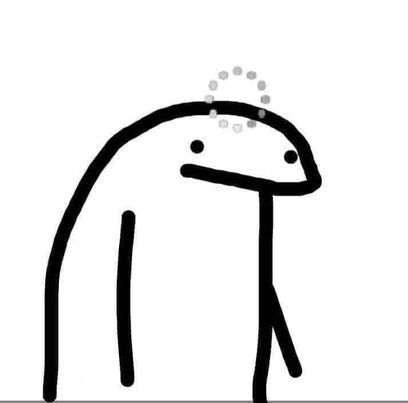

## notebook 2 

1. Creation of embeddings from protein language models 

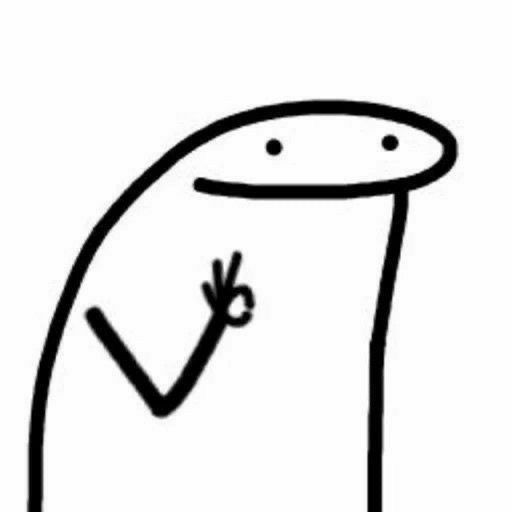

## notebook 3

1. Comparison of the organization of the sequences by 7 distinct protein language model and aminoacid composition.
2. Comparion of 3 algorithms of reduction of dimencionality (PCA, tSNE and UMAP)
3. Hyperparameter effects in tSNE and UMAP

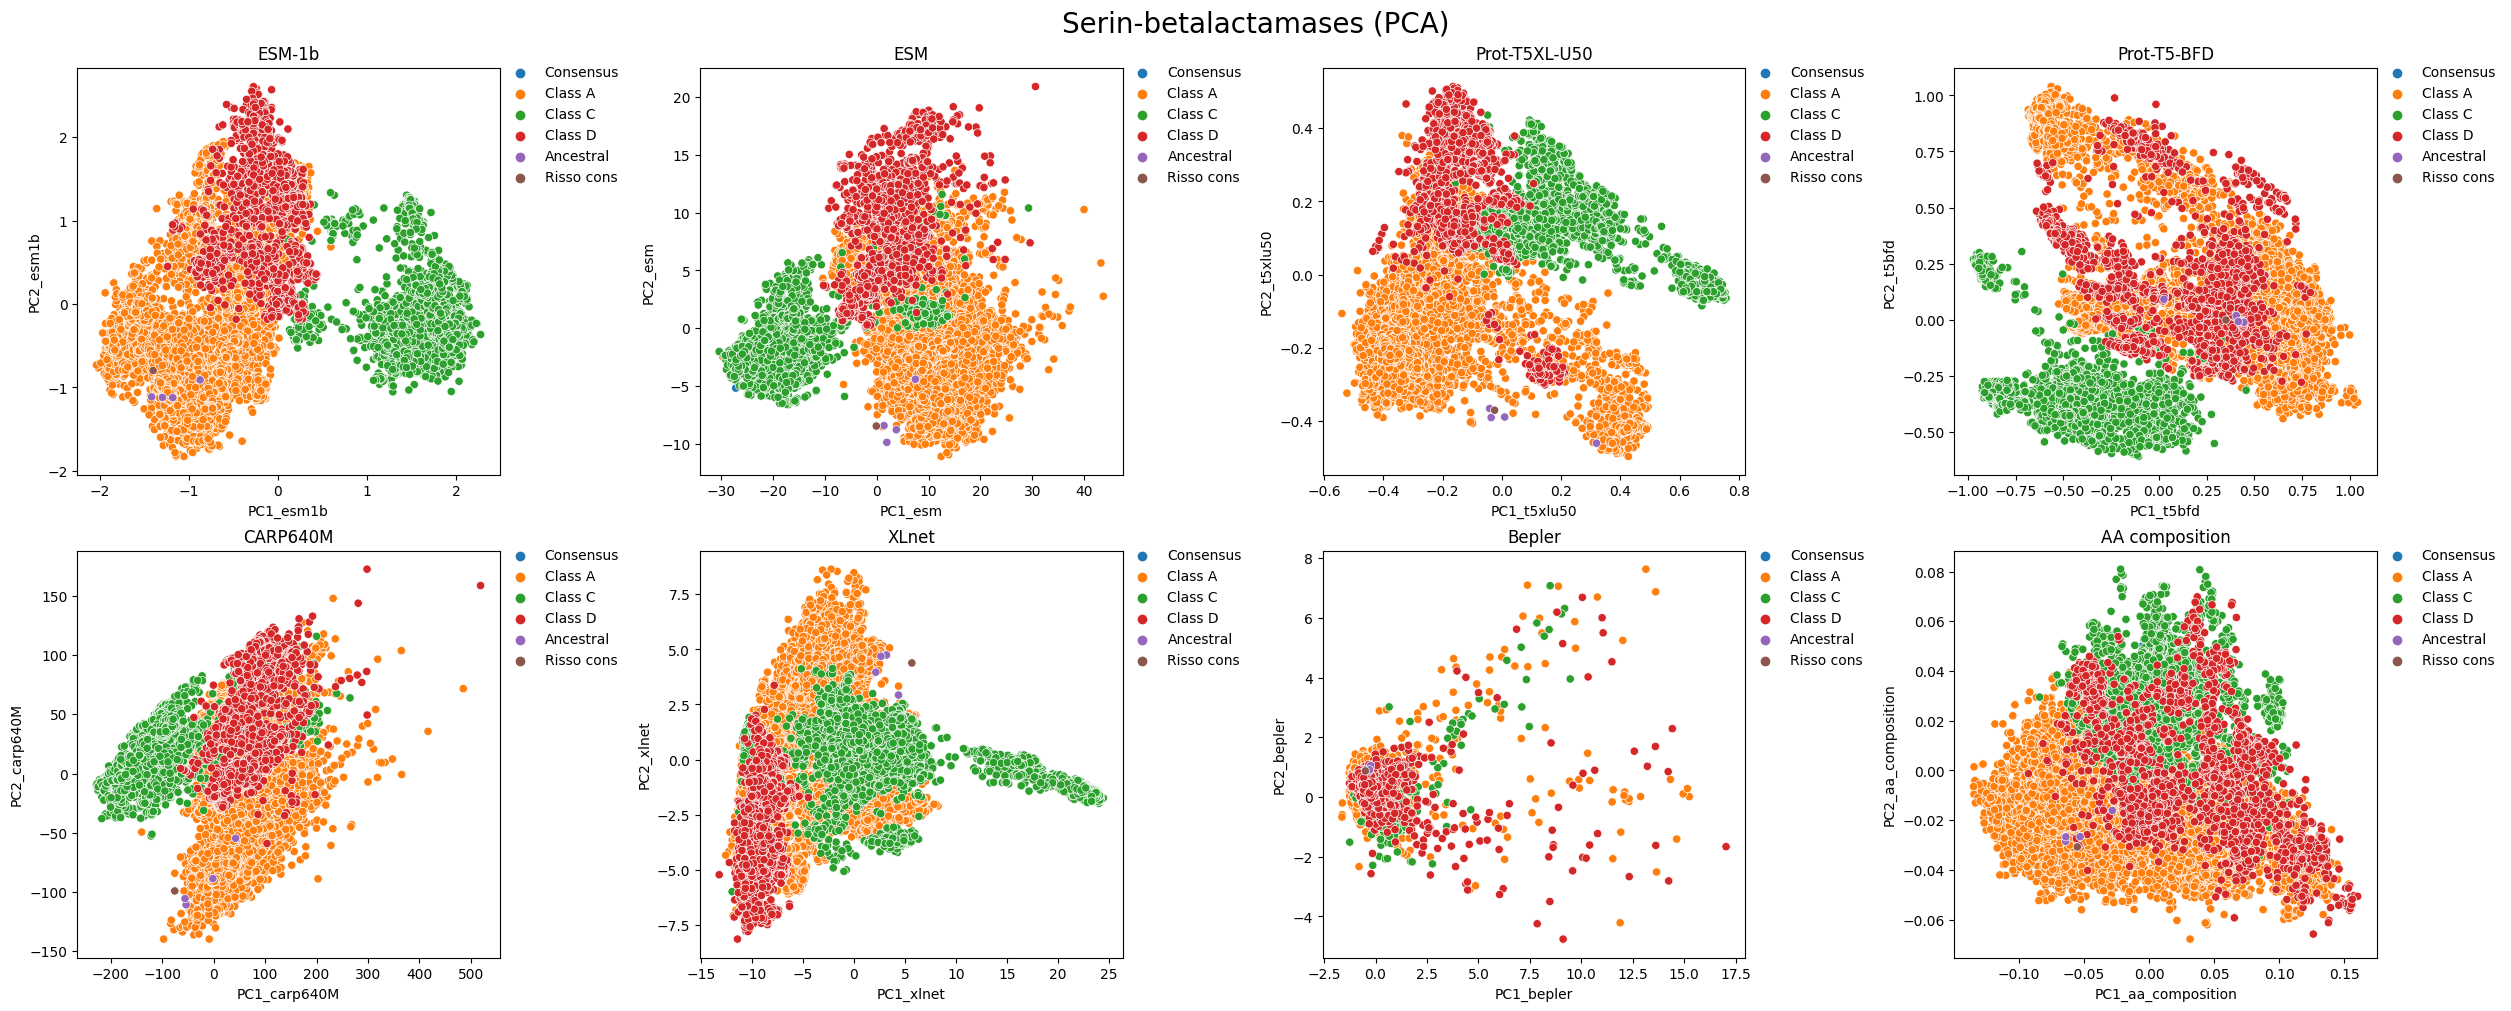
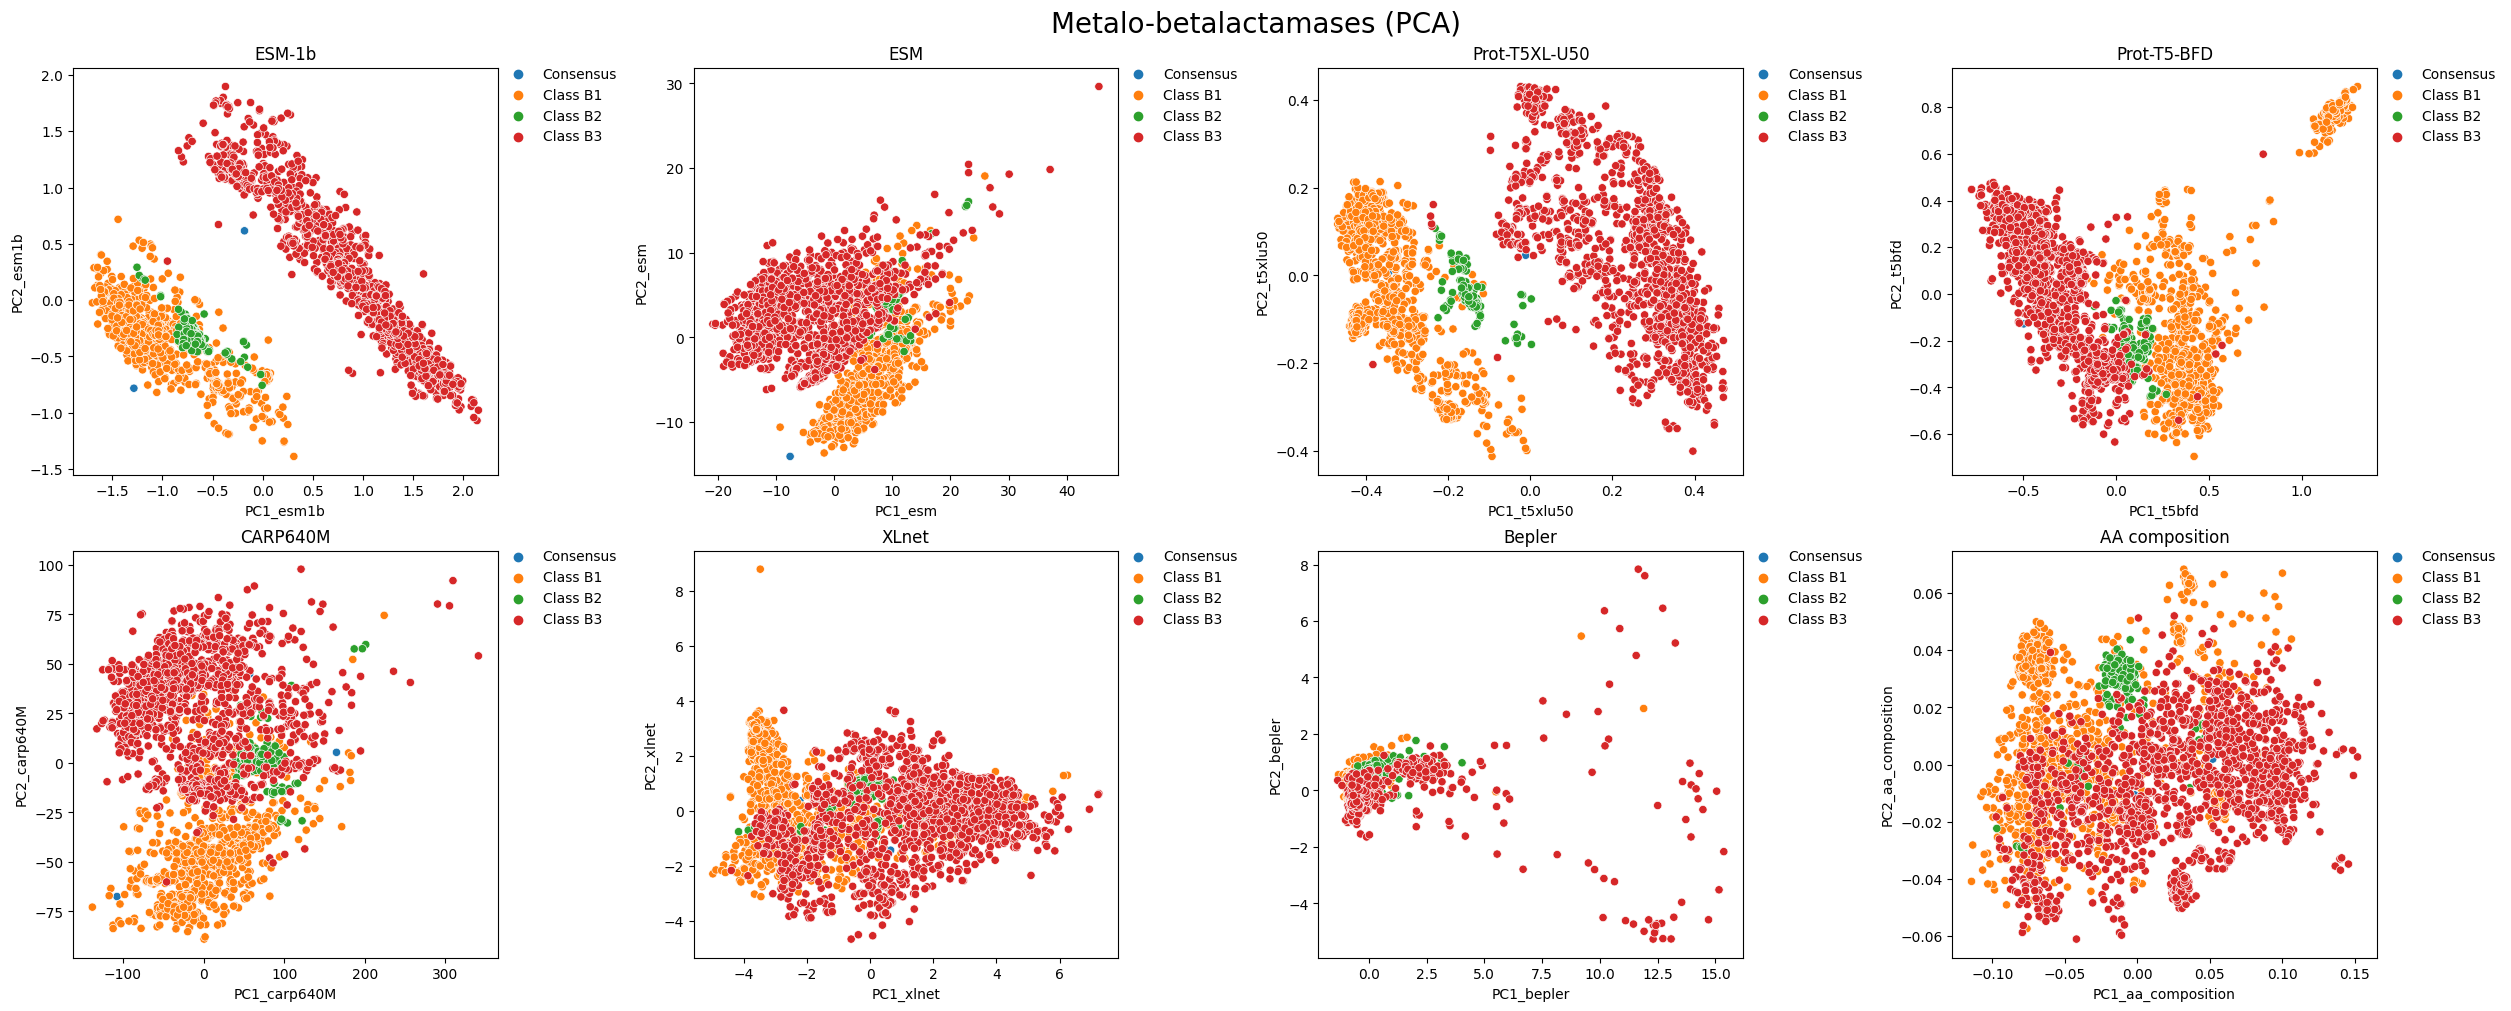
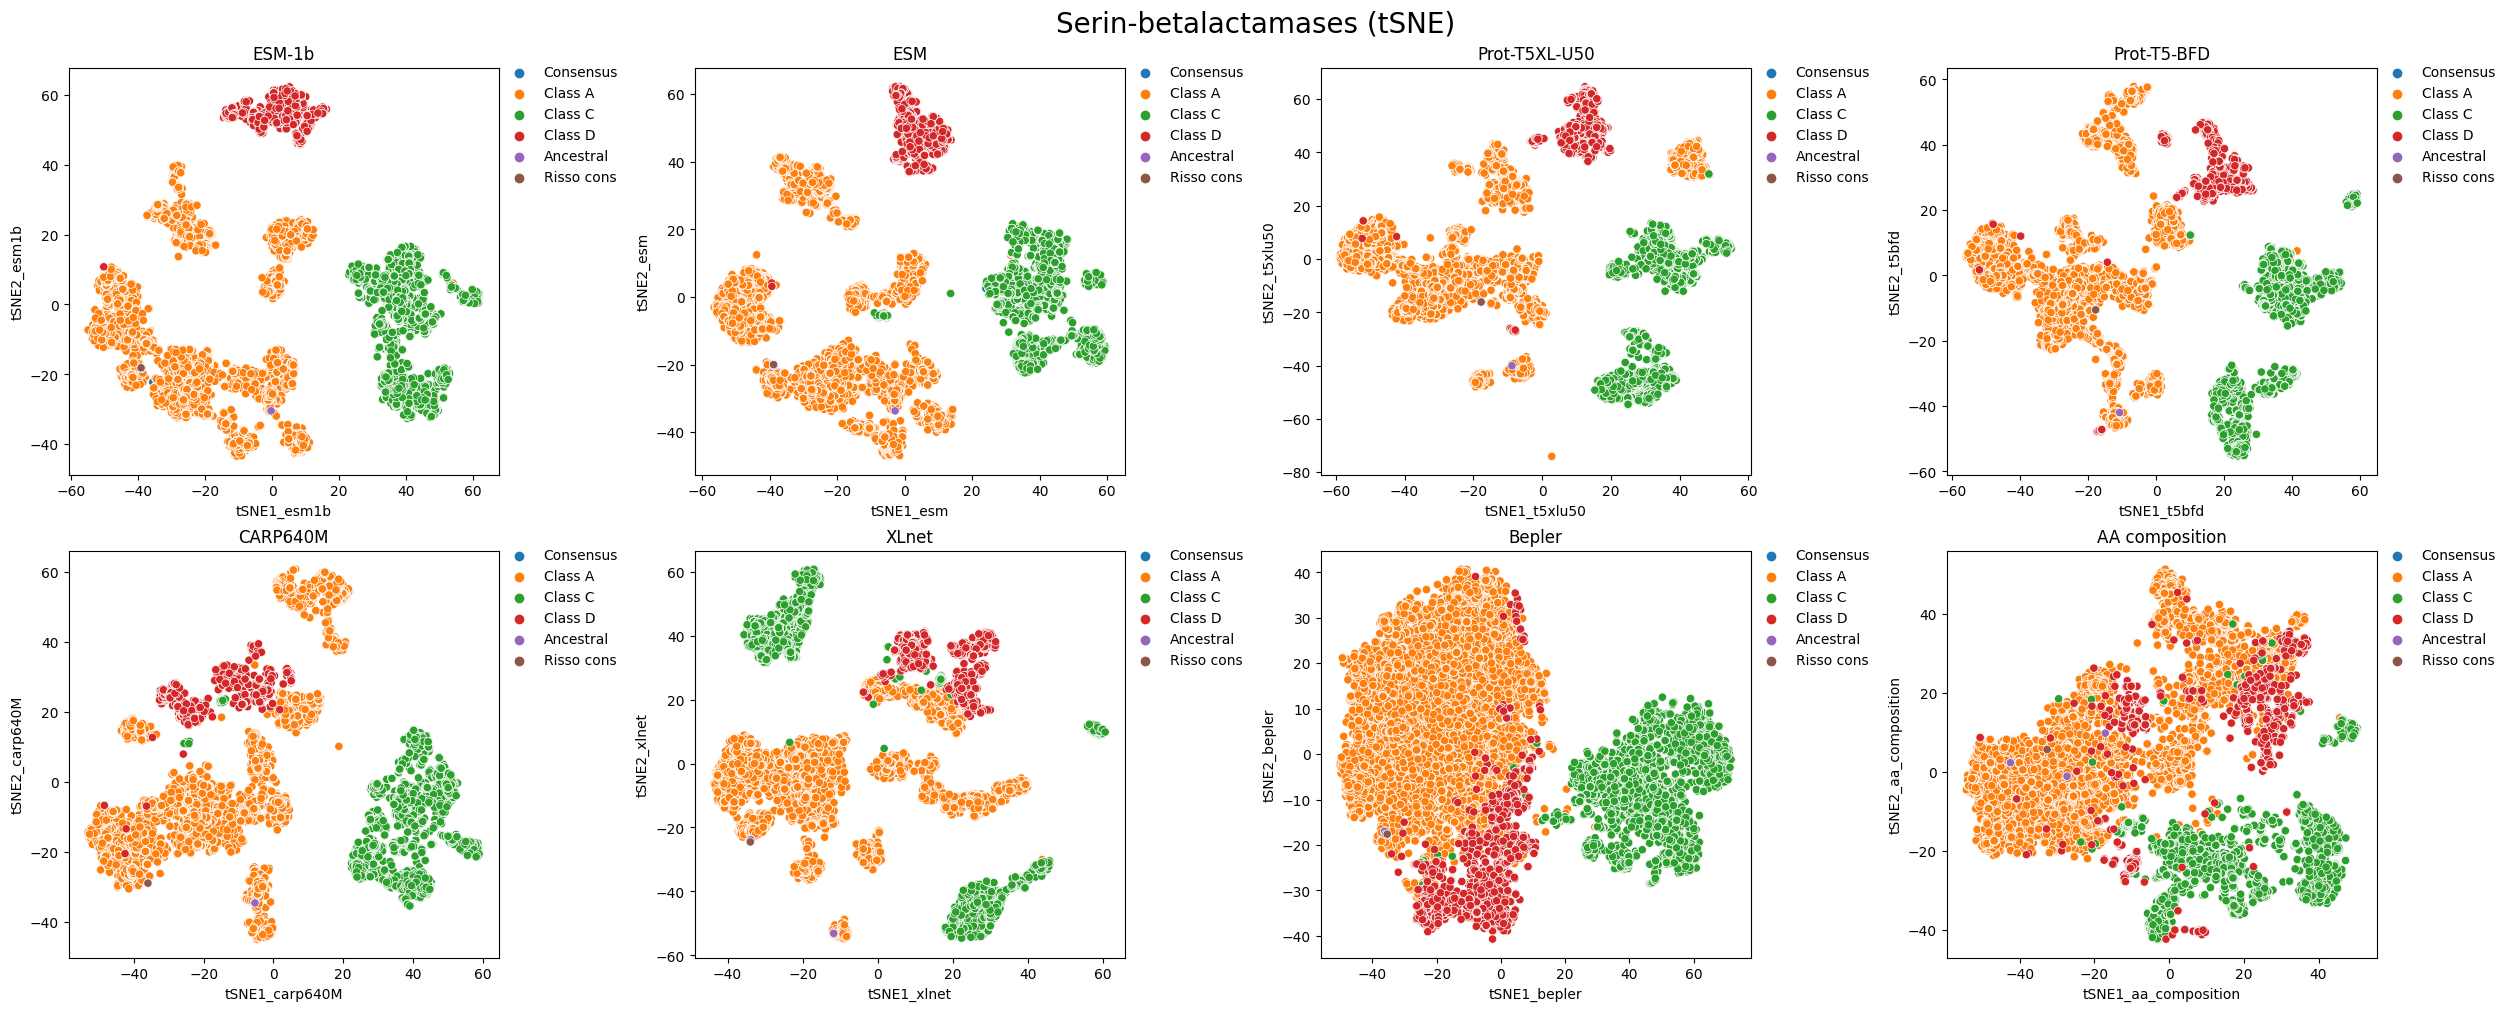
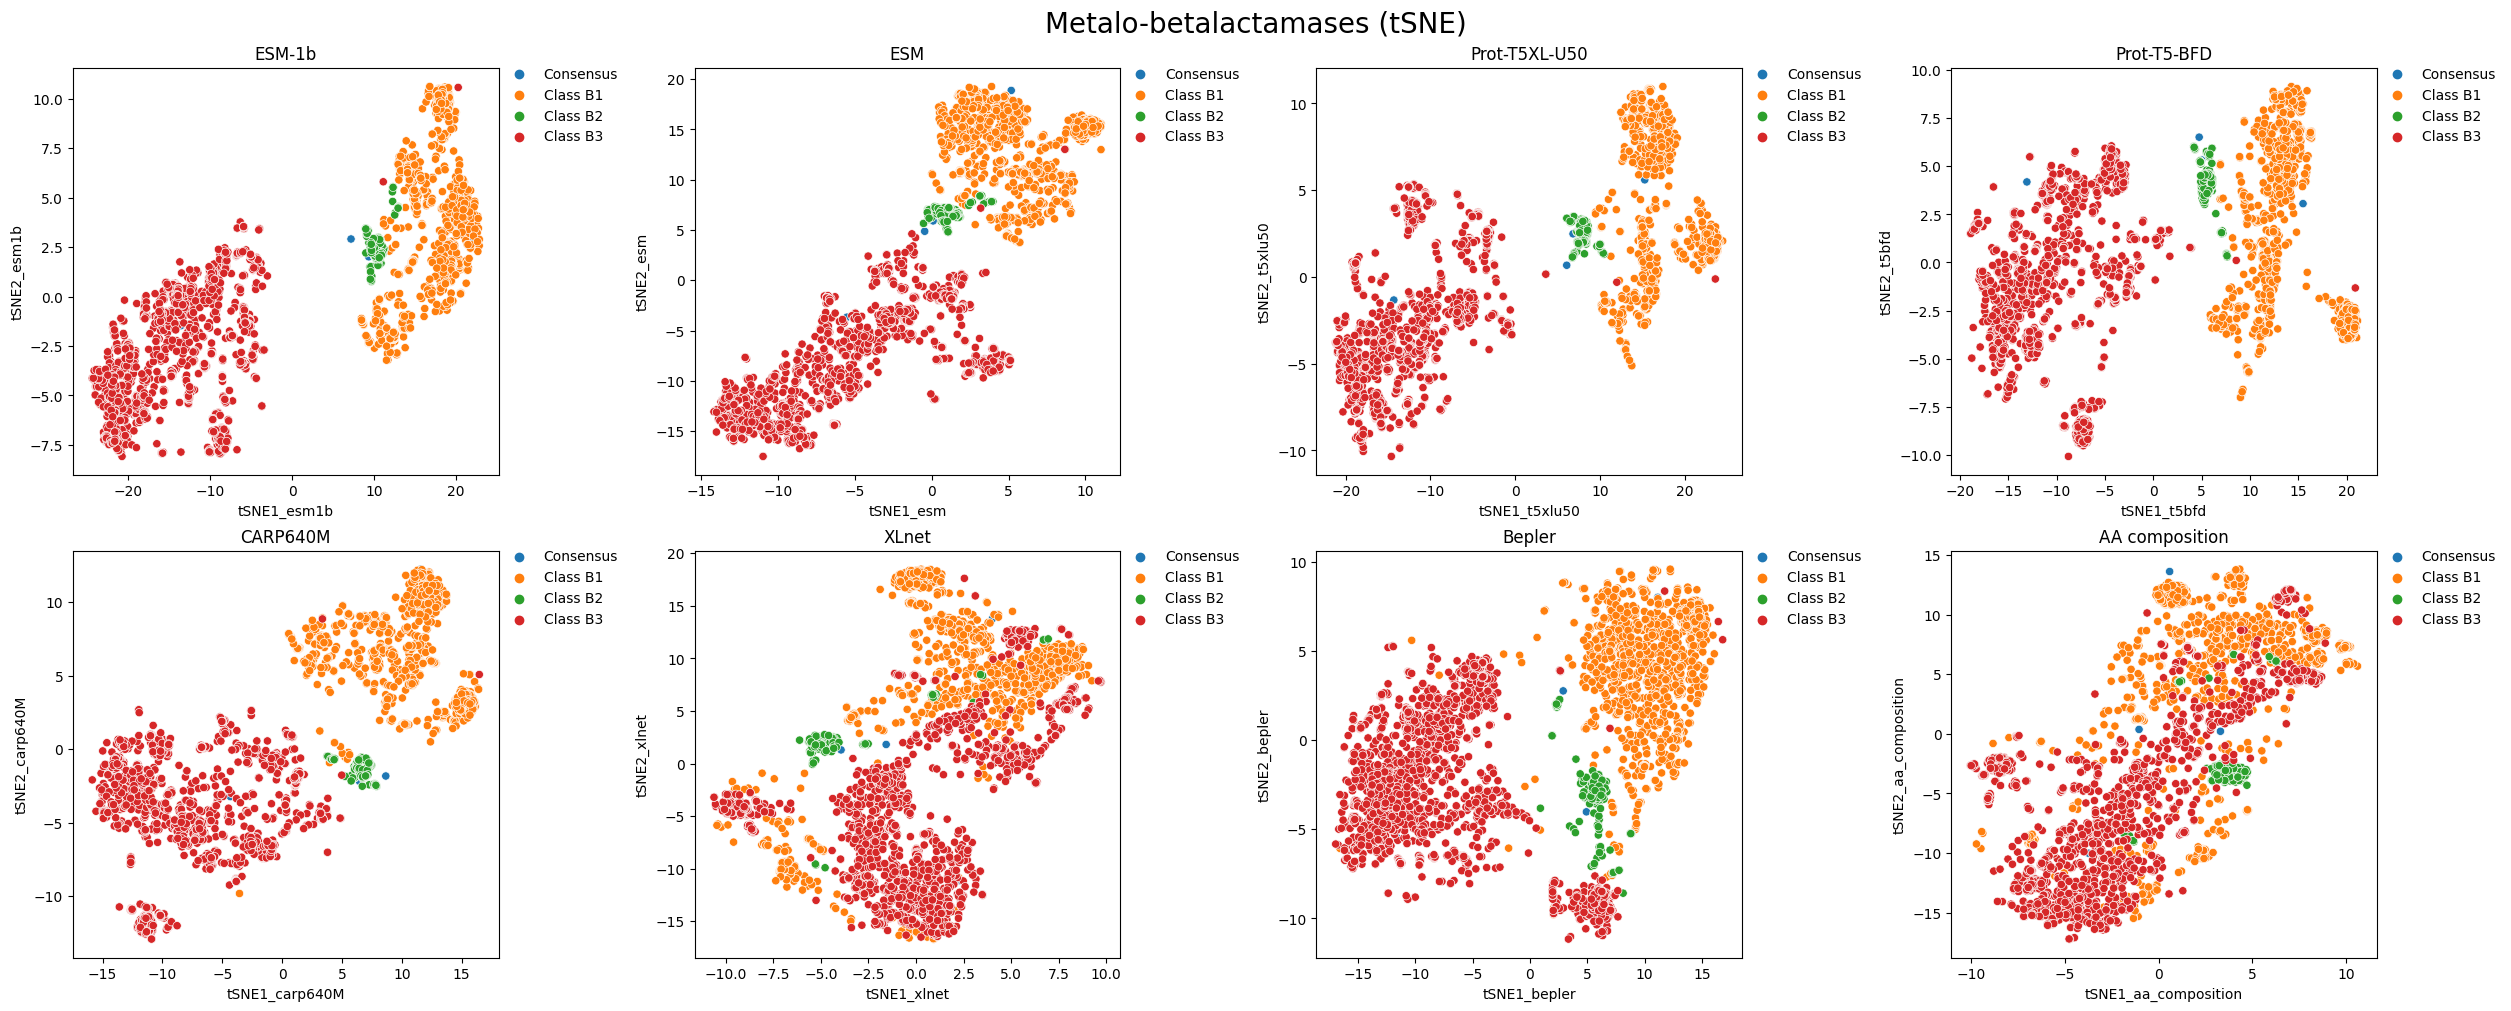
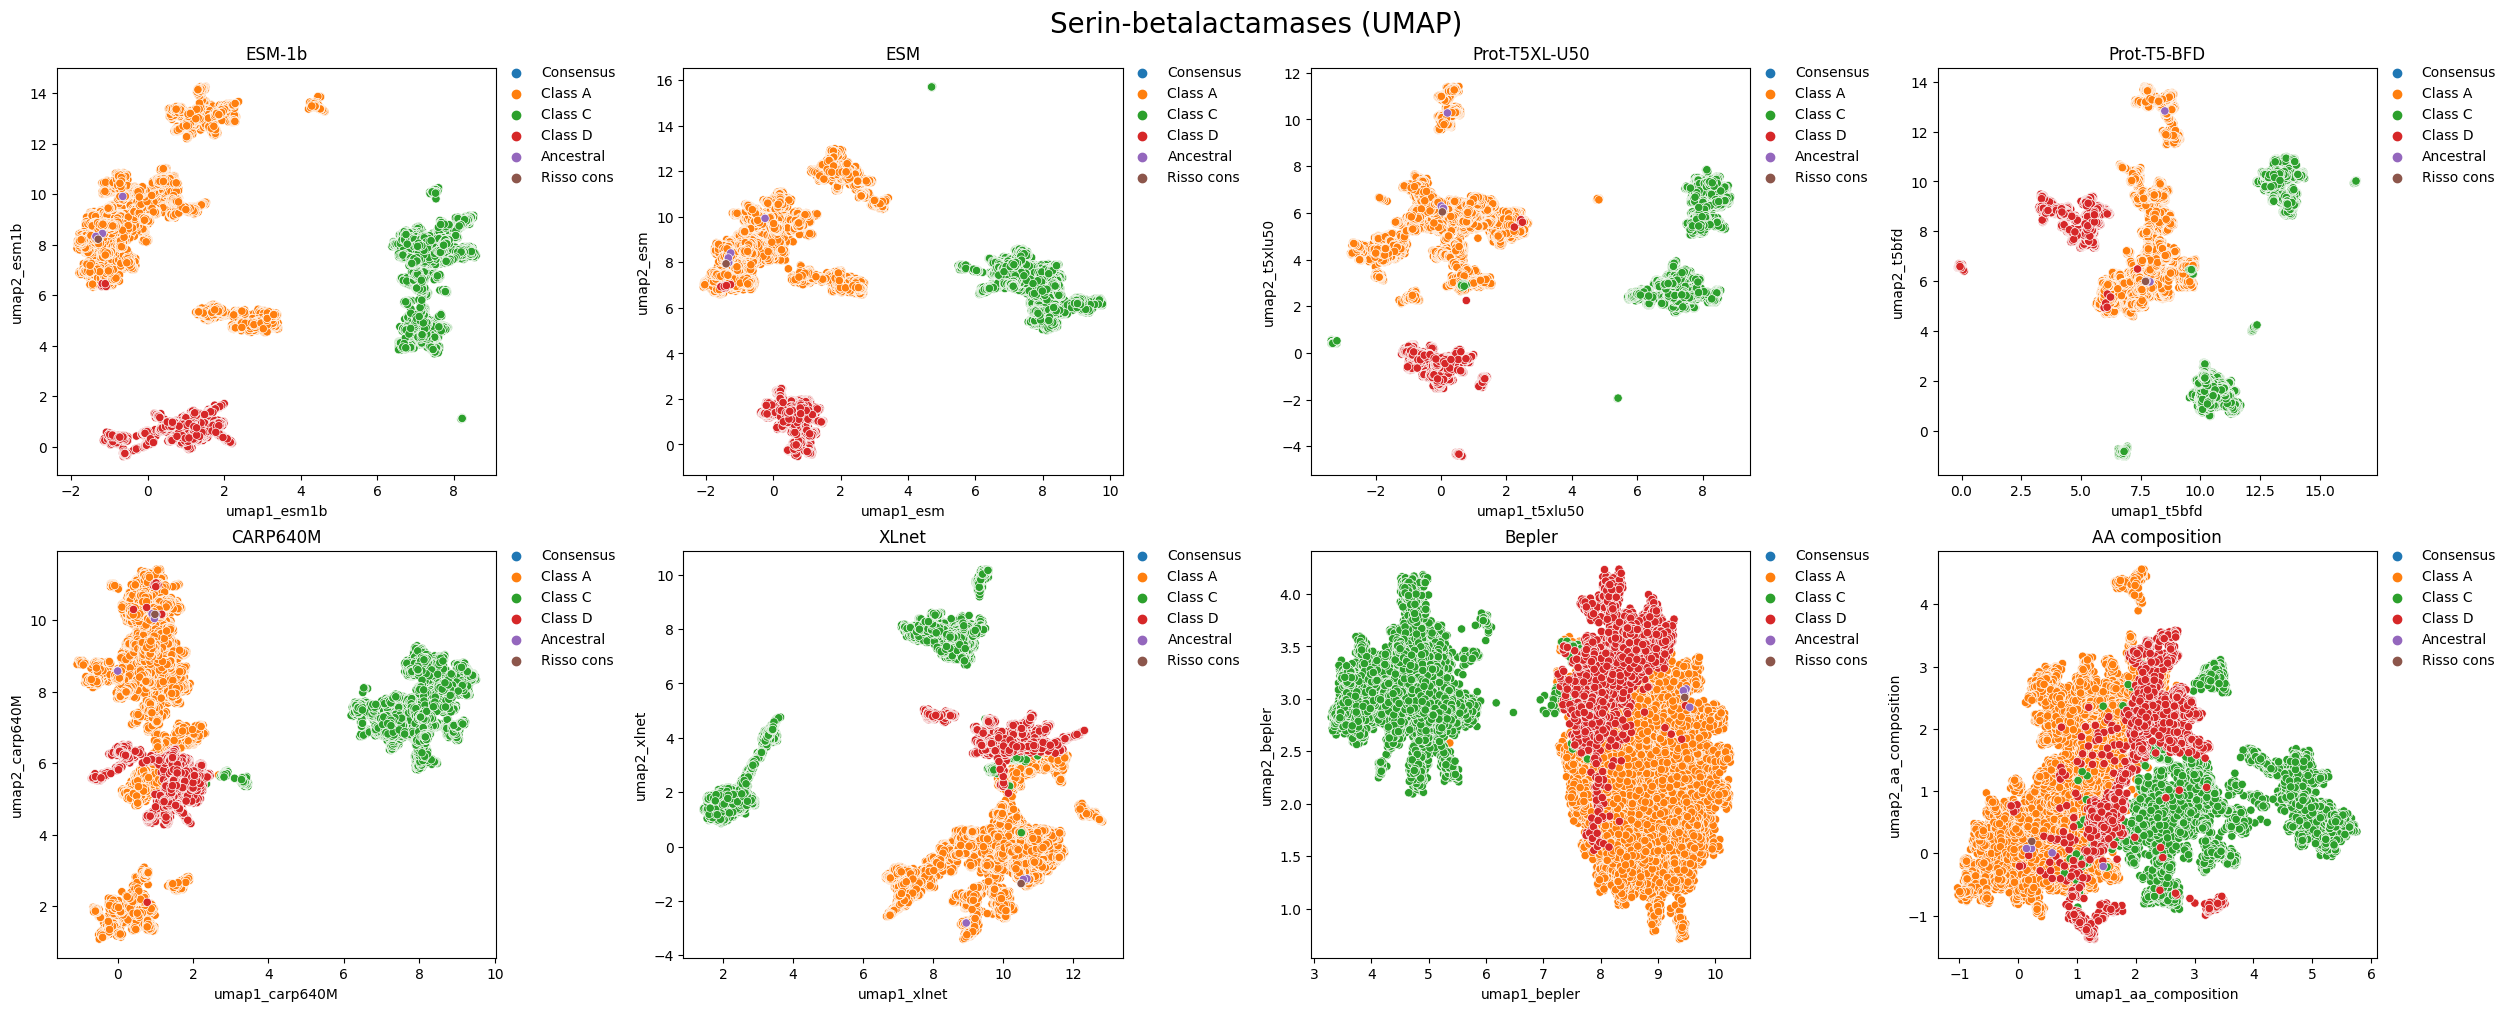
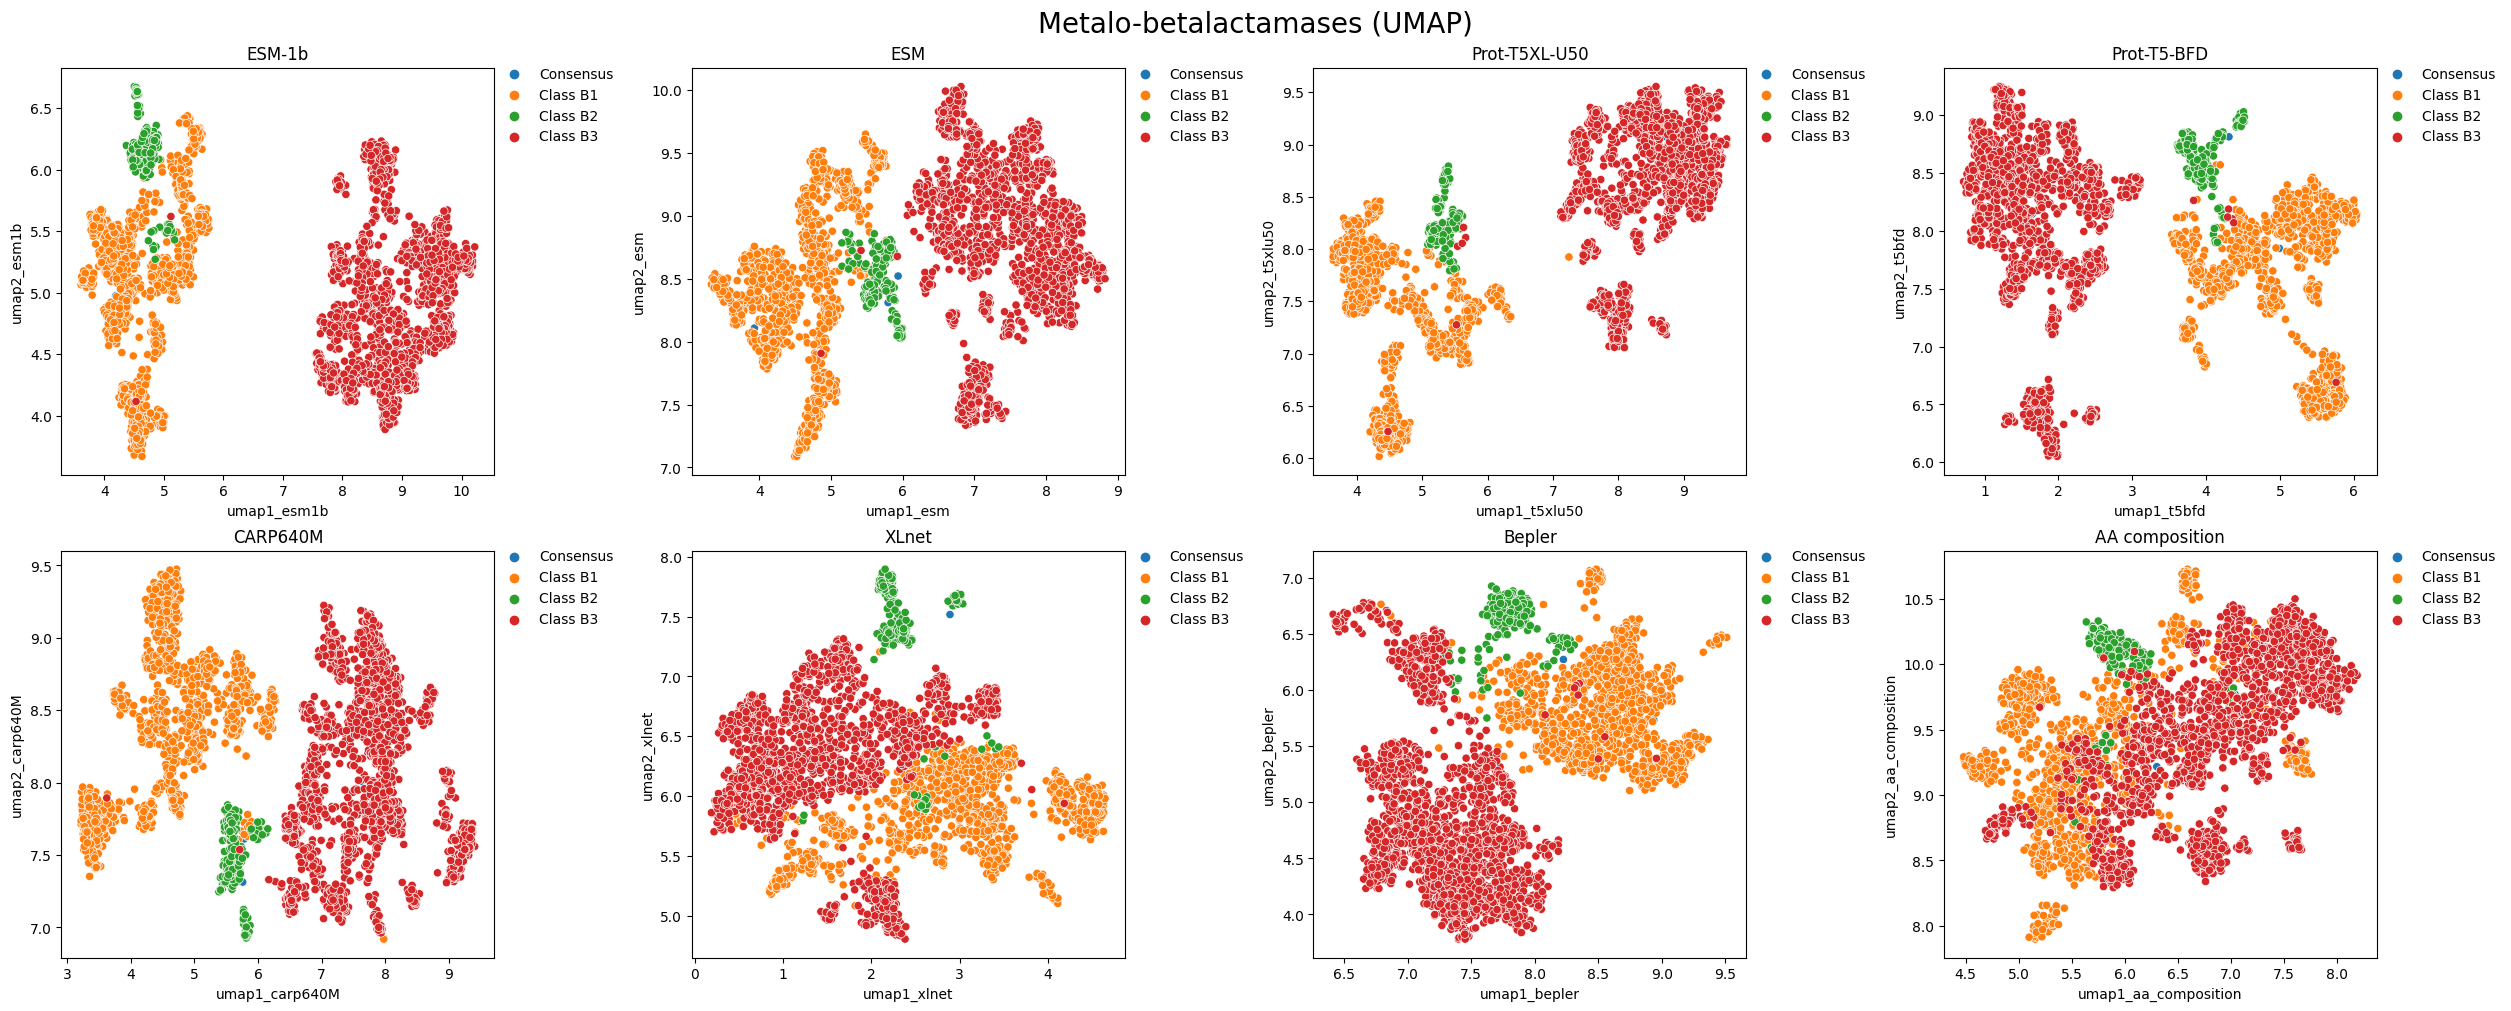

## notebook 4 

1. The "manually curated" DB of 50 betalactam antibiotics contains errors
2. Penicillins are relatively more similar (based on SMILES codificacion) between them in relation with the other main classes of betalactam antibiotics

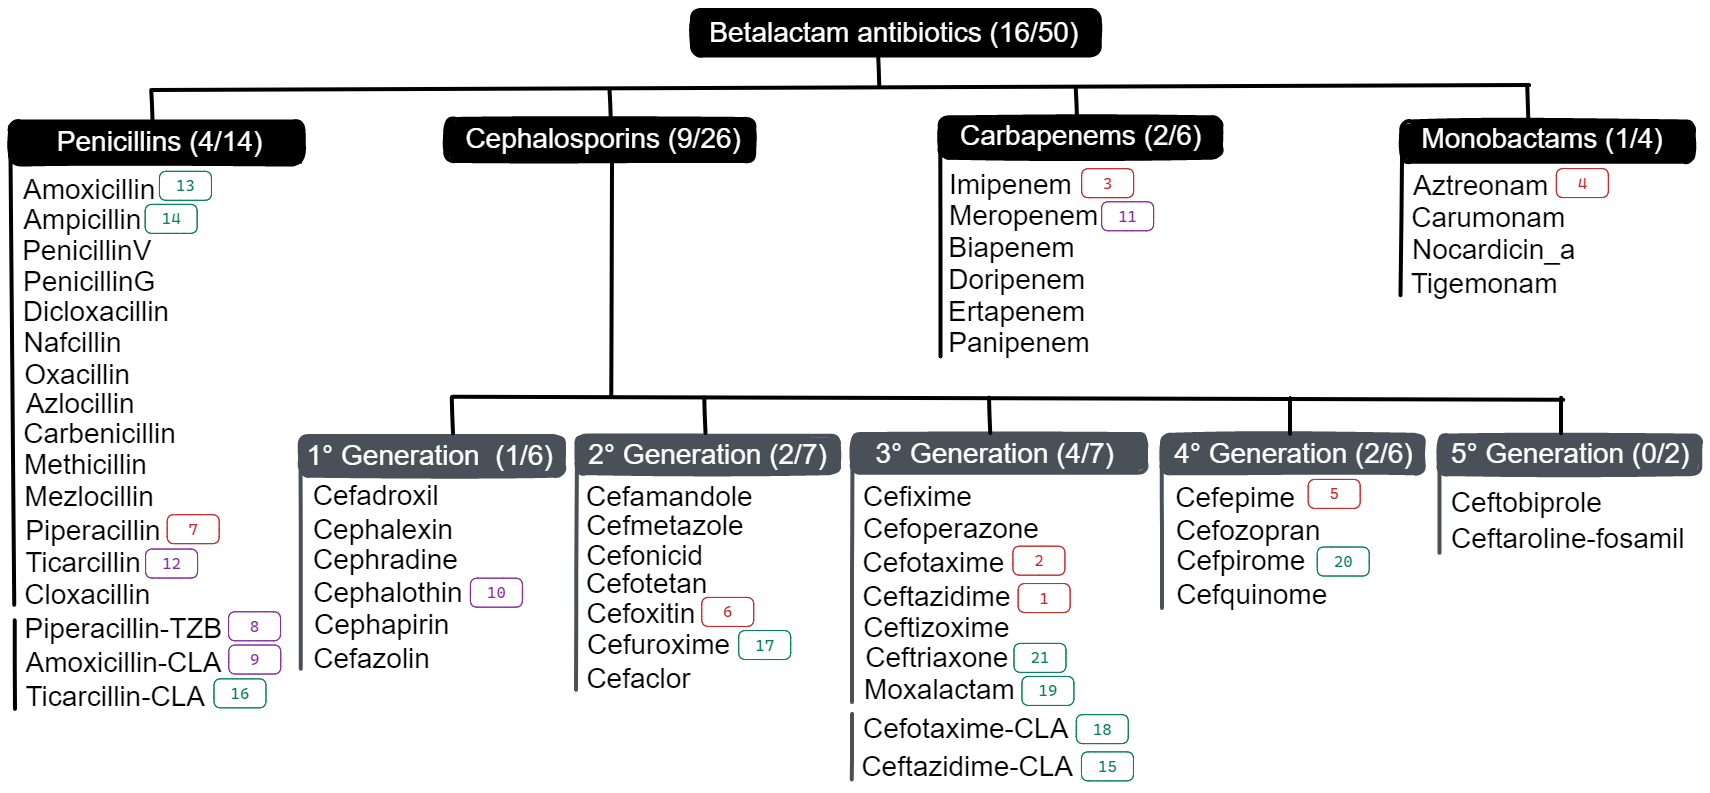
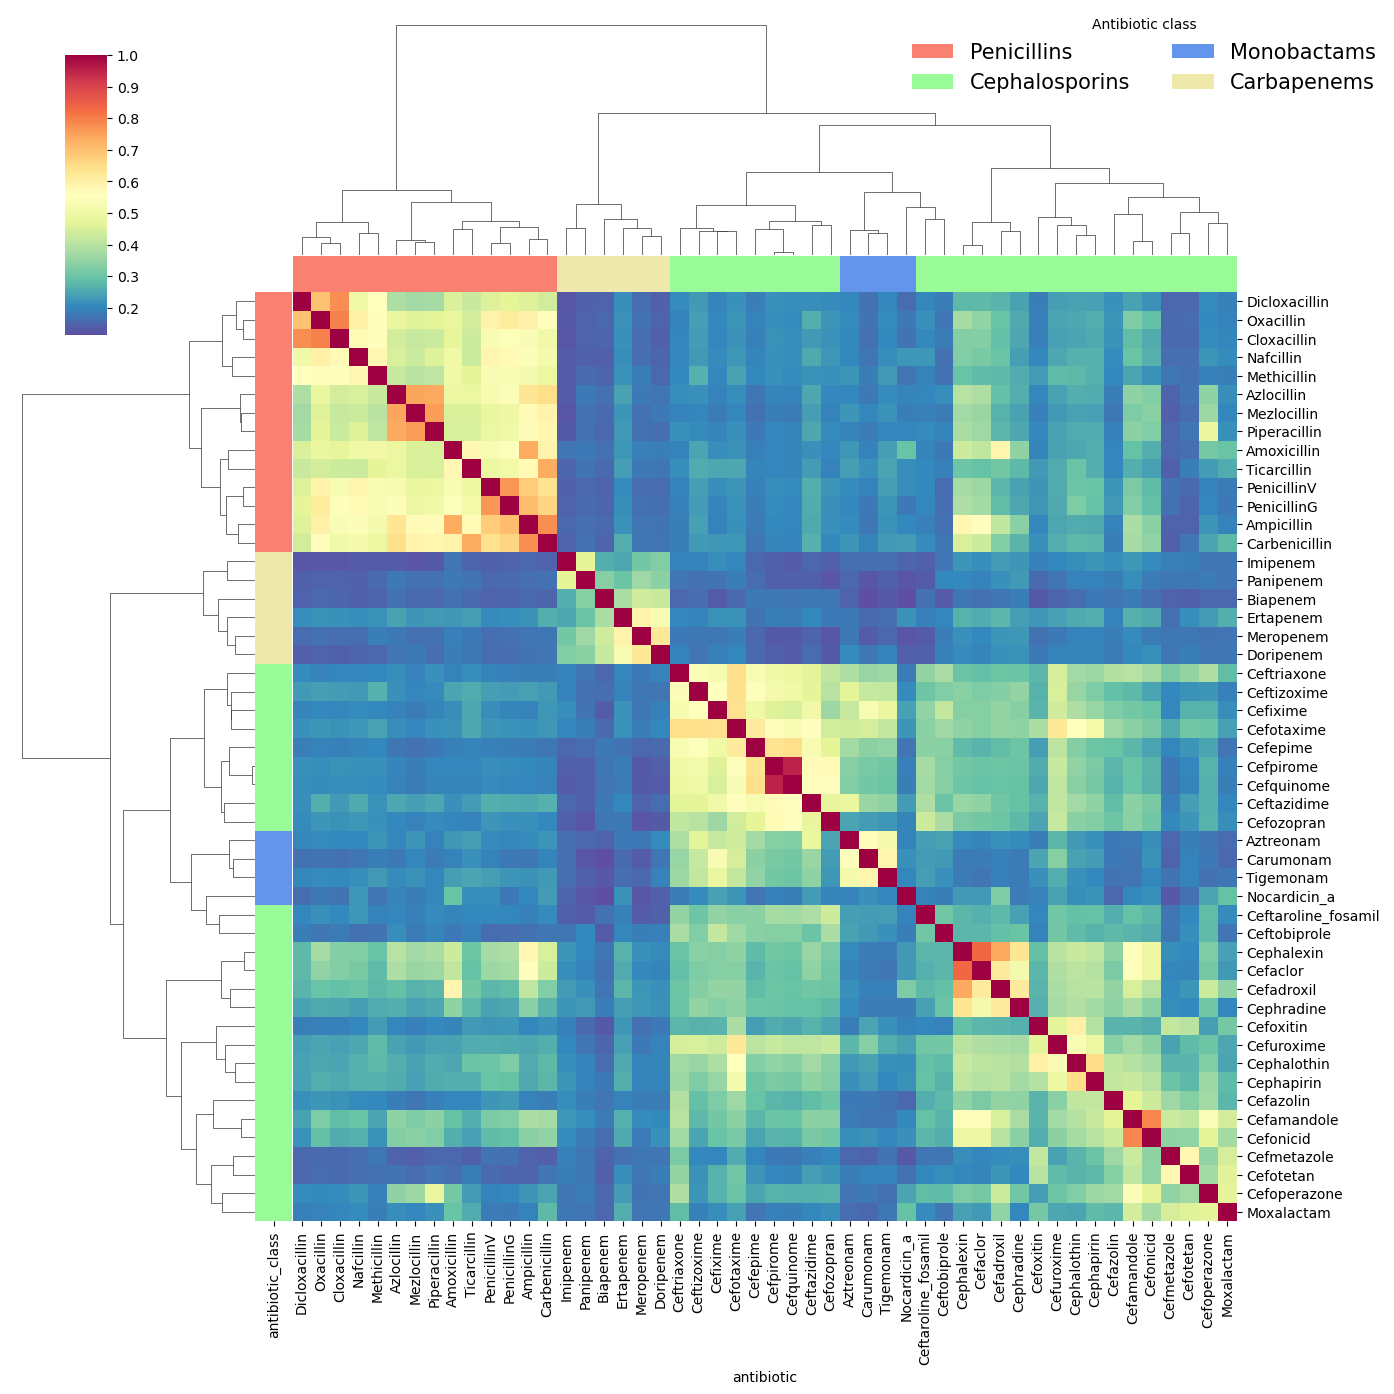
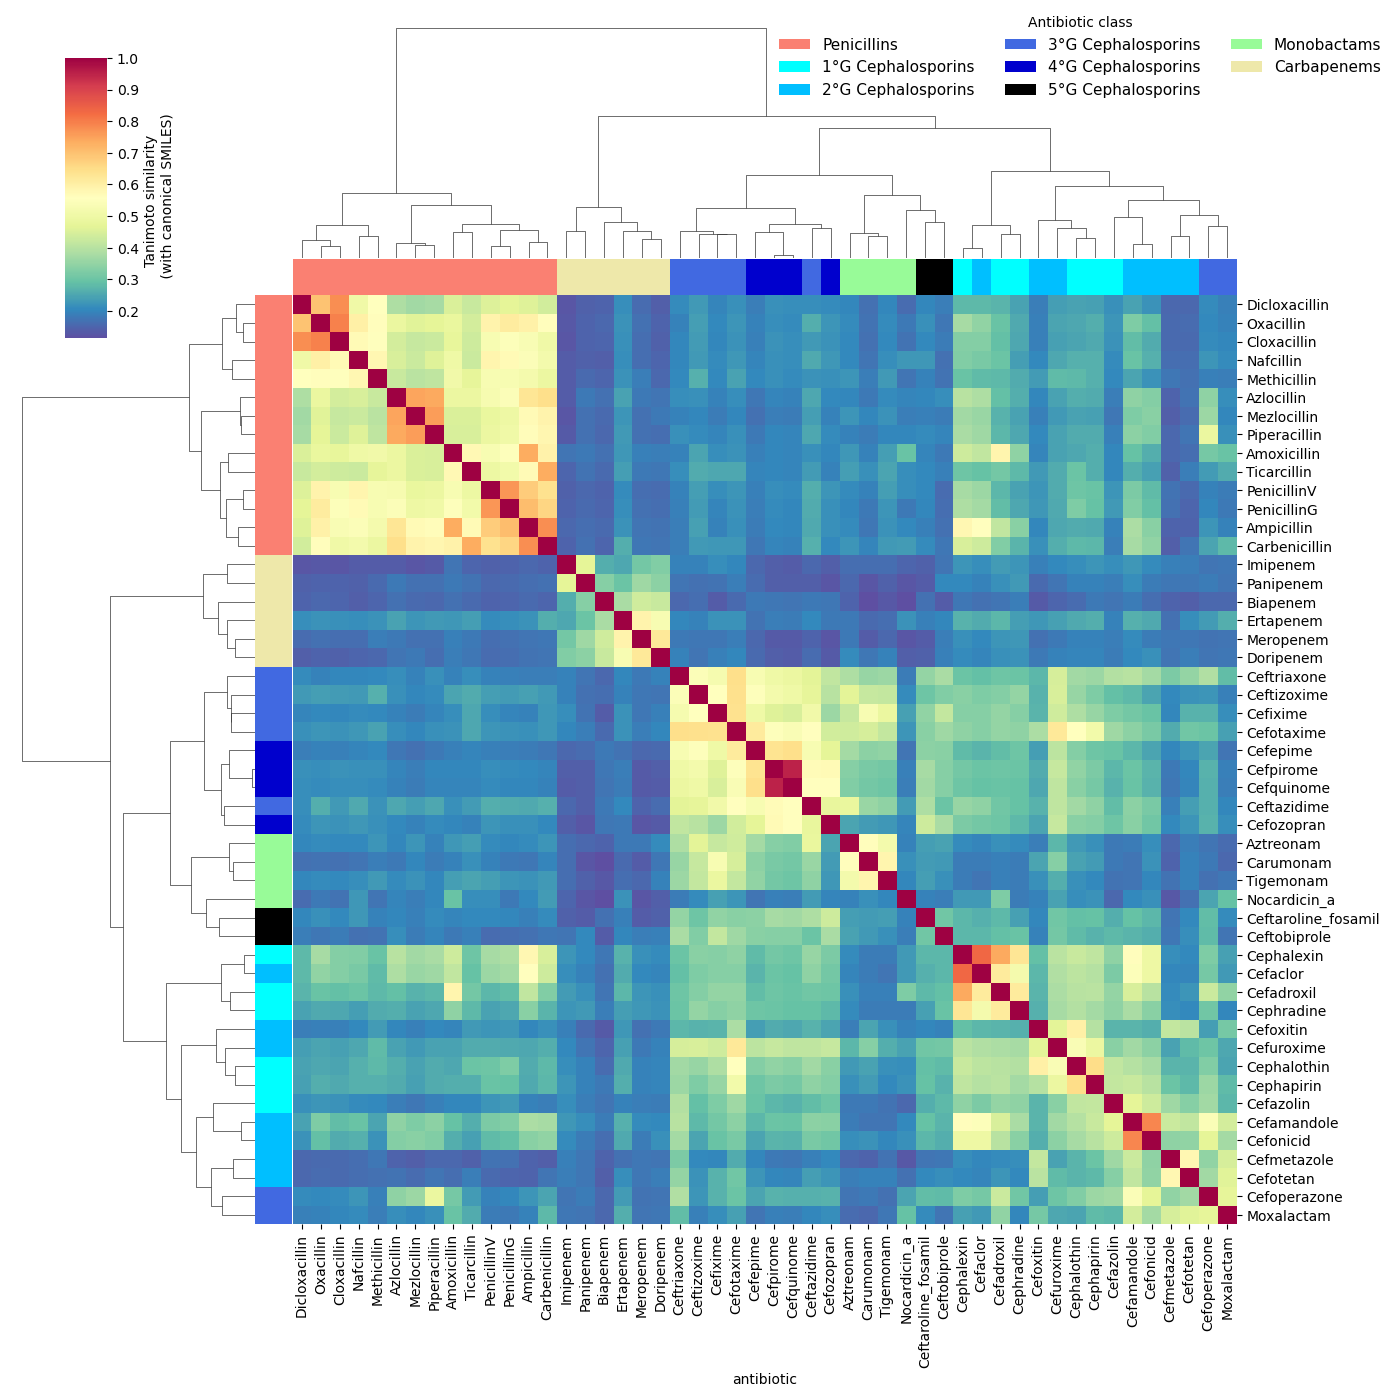

## notebook 5 

1. 3 outiers potins of the MICs dataset were removed because have extreme log2_fold values
2. The distrobutions of betalactam antibiotics follow the literature trends 
3. There are "functional redundancy" in cephalosporins and penicillins

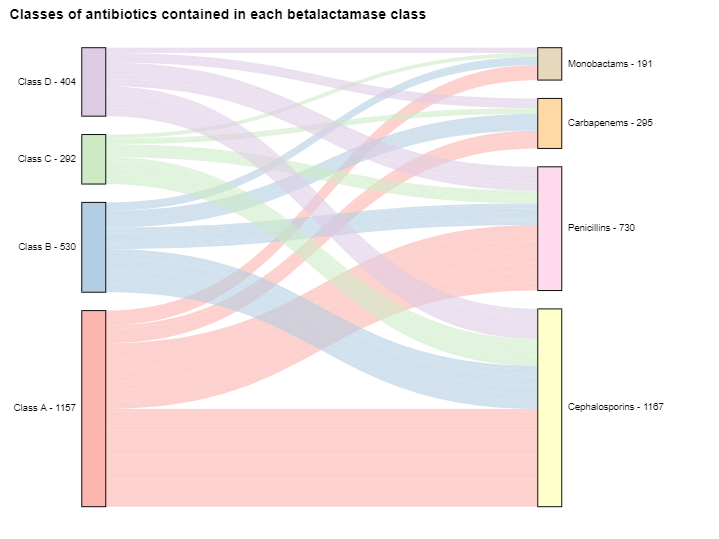



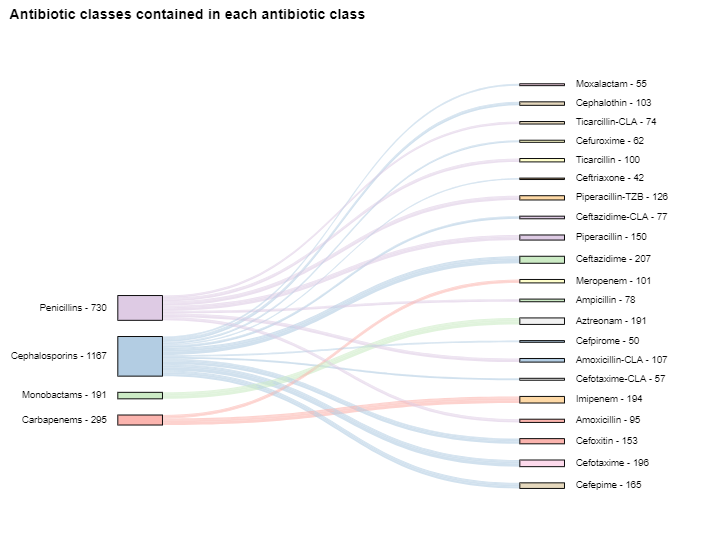



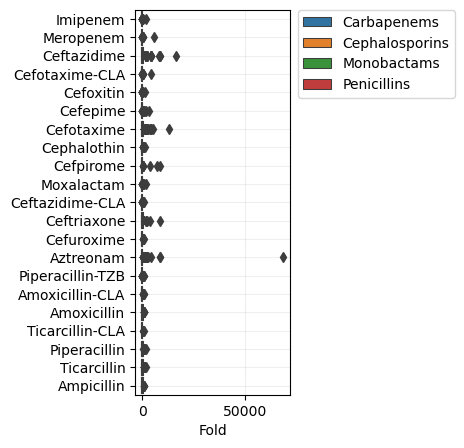
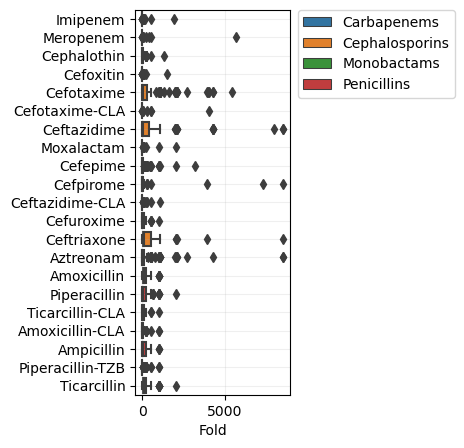

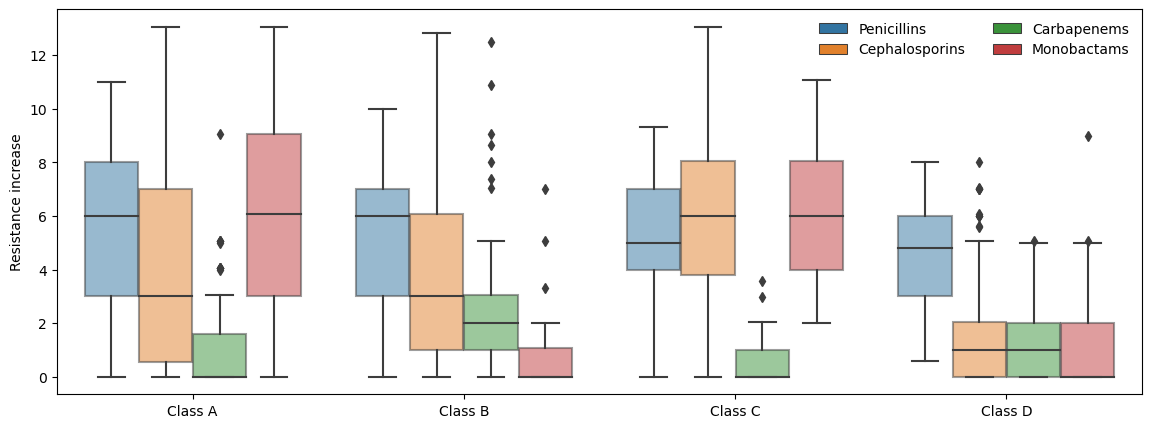
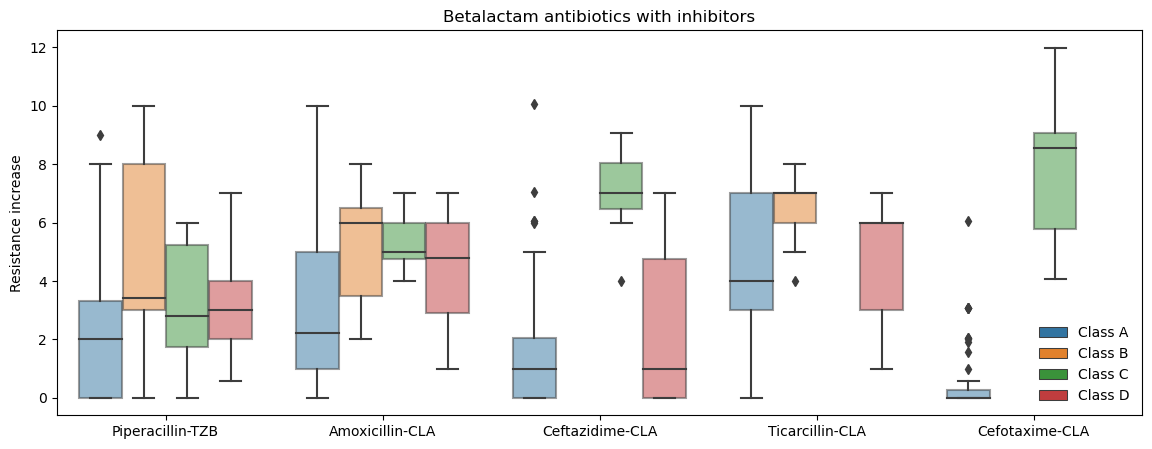

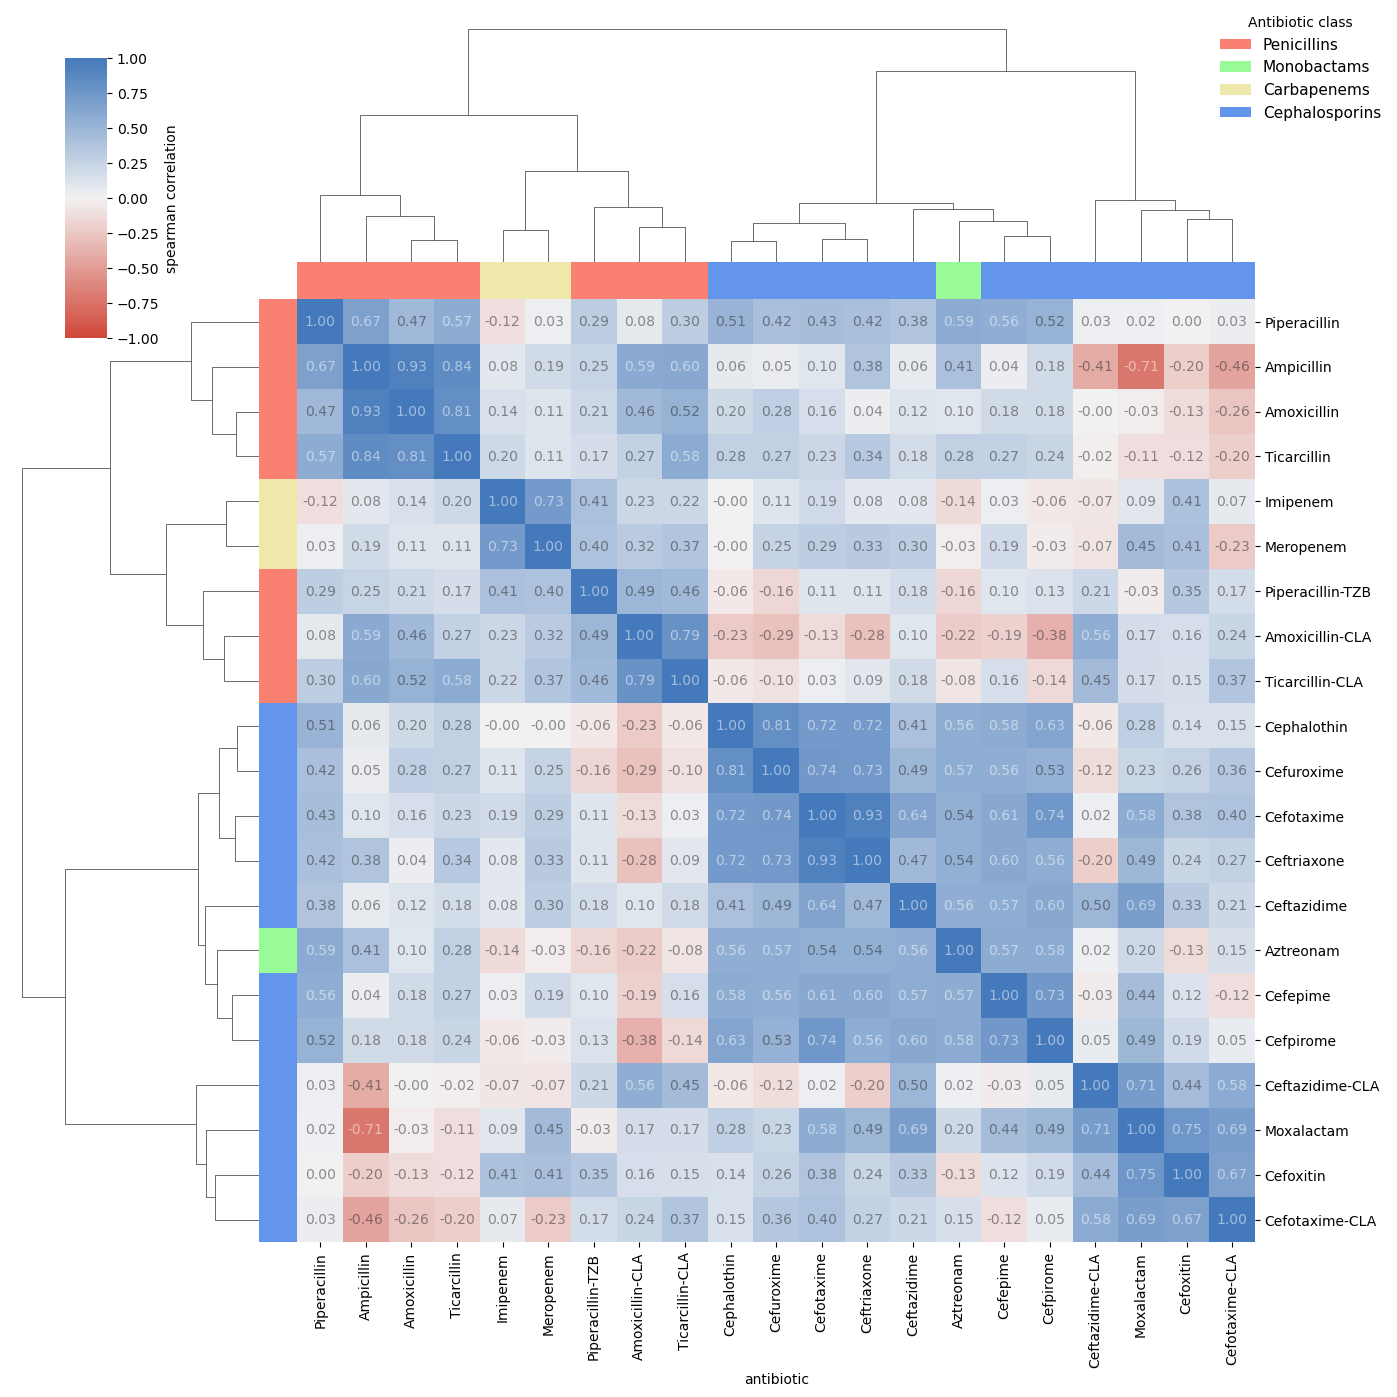
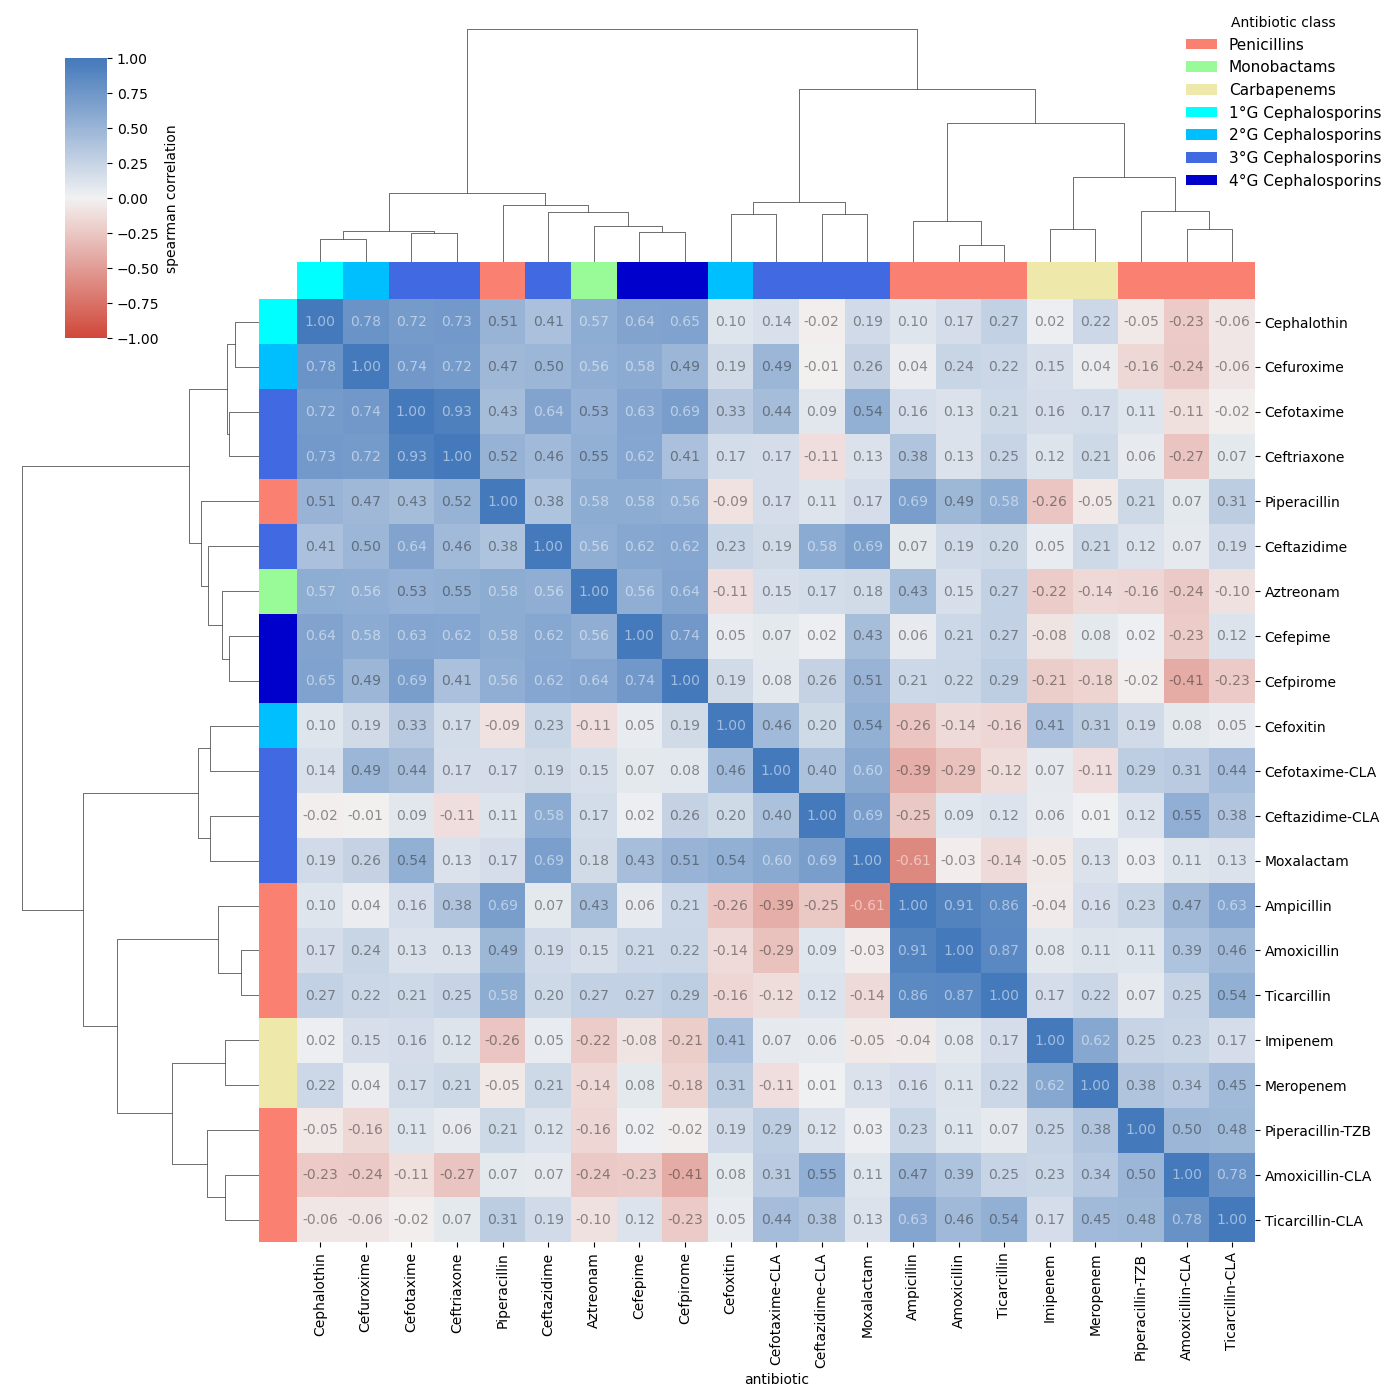

## notebook 6


## notebook 7

## notebook 8

## notebook 10


## notebook 10